In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import itertools
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
#Store Data
store = pd.read_csv("/content/drive/MyDrive/ML Project /MLP2/store.csv")
store.describe()
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [ ]:
#Train Data
train = pd.read_csv("/content/drive/MyDrive/ML Project /MLP2/train.csv", parse_dates = True, low_memory = False, index_col = 'Date')
train.describe()
train.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-31      2          5   6064        625     1      1            0   
2015-07-31      3          5   8314        821     1      1            0   
2015-07-31      4          5  13995       1498     1      1            0   
2015-07-31      5          5   4822        559     1      1            0   

            SchoolHoliday  
Date                       
2015-07-31              1  
2015-07-31              1  
2015-07-31              1  
2015-07-31              1  
2015-07-31              1

In [ ]:
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.isocalendar().week
train.info()
train.head()
train['SalePerCustomer'] = train['Sales']/train['Customers']
train['SalePerCustomer'].describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
 8   Year           1017209 non-null  int32 
 9   Month          1017209 non-null  int32 
 10  Day            1017209 non-null  int32 
 11  WeekOfYear     1017209 non-null  UInt32
dtypes: UInt32(1), int32(3), int64(7), object(1)
memory usage: 86.3+ MB


count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

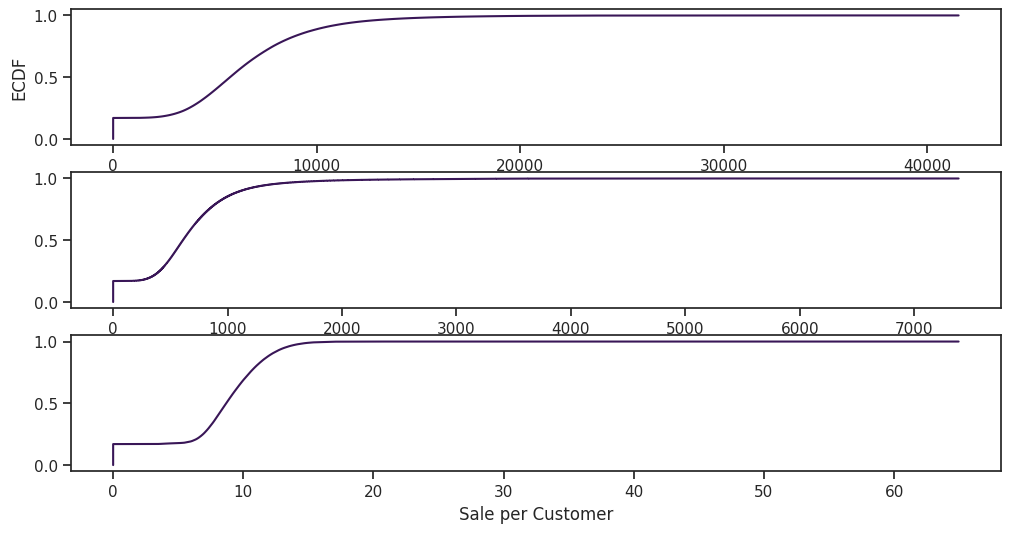

In [ ]:
train.isnull().sum()
train.fillna(0, inplace = True)
sns.set(style = "ticks")
c = '#391657'
plt.figure(figsize = (12, 6))

plt.subplot(311)
cdf = ECDF(train['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sales'); plt.ylabel('ECDF');
plt.subplot(312)
cdf = ECDF(train['Customers'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Customers');

plt.subplot(313)
cdf = ECDF(train['SalePerCustomer'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sale per Customer');

In [ ]:
# closed stores
train[(train.Open == 0) & (train.Sales == 0)]



Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31    292          5      0          0     0      1            0   
2015-07-31    876          5      0          0     0      1            0   
2015-07-30    292          4      0          0     0      1            0   
2015-07-30    876          4      0          0     0      1            0   
2015-07-29    292          3      0          0     0      1            0   
...           ...        ...    ...        ...   ...    ...          ...   
2013-01-01   1111          2      0          0     0      0            a   
2013-01-01   1112          2      0          0     0      0            a   
2013-01-01   1113          2      0          0     0      0            a   
2013-01-01   1114          2      0          0     0      0            a   
2013-01-01   1115          2      0          0     0      0            a   

            SchoolHoliday  Year  Month  Day  WeekOfYear  SalePerCustomer  
Date                                                                      
2015-07-31              1  2015      7   31          31              0.0  
2015-07-31              1  2015      7   31          31              0.0  
2015-07-30              1  2015      7   30          31              0.0  
2015-07-30              1  2015      7   30          31              0.0  
2015-07-29              1  2015      7   29          31              0.0  
...                   ...   ...    ...  ...         ...              ...  
2013-01-01              1  2013      1    1           1              0.0  
2013-01-01              1  2013      1    1           1              0.0  
2013-01-01              1  2013      1    1           1              0.0  
2013-01-01              1  2013      1    1           1              0.0  
2013-01-01              1  2013      1    1           1              0.0  

[172817 rows x 13 columns]

In [ ]:
# opened stores with zero sales
zero_sales = train[(train.Open != 0) & (train.Sales == 0)]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (54, 13)


Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-05-15    971          5      0          0     1      0            0   
2015-03-26    674          4      0          0     1      0            0   
2015-02-05    699          4      0          0     1      1            0   
2014-10-01    708          3      0          0     1      1            0   
2014-09-22    357          1      0          0     1      0            0   

            SchoolHoliday  Year  Month  Day  WeekOfYear  SalePerCustomer  
Date                                                                      
2015-05-15              1  2015      5   15          20              0.0  
2015-03-26              0  2015      3   26          13              0.0  
2015-02-05              0  2015      2    5           6              0.0  
2014-10-01              0  2014     10    1          40              0.0  
2014-09-22              0  2014      9   22          39              0.0

In [ ]:
print("Closed stores and days which didn't have any sales won't be counted into the forecasts.")

train = train[(train["Open"] != 0) & (train['Sales'] != 0)]

print("In total: ", train.shape)
train=train.drop(columns=train[(train.Open == 1) & (train.Sales == 0)].index)


Closed stores and days which didn't have any sales won't be counted into the forecasts.
In total:  (844338, 13)


In [ ]:
{"Mean":np.mean(train.Sales),"Median":np.median(train.Sales)}
train.Customers.describe()


count    844338.000000
mean        762.777166
std         401.194153
min           8.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

In [ ]:
store.head()
store.isnull().sum()


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# missing values in CompetitionDistance
store[pd.isnull(store.CompetitionDistance)]
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

In [ ]:

_ = store[pd.isnull(store.Promo2SinceWeek)]
_[_.Promo2 != 0].shape
store.fillna(0, inplace = True)


In [ ]:
print("Joining train set with an additional store information.")

train_store = pd.merge(train, store, how = 'inner', on = 'Store')

print("In total: ", train_store.shape)
train_store.head(1000)


Joining train set with an additional store information.
In total:  (844338, 22)


Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0        1          5   5263        555     1      1            0   
1        2          5   6064        625     1      1            0   
2        3          5   8314        821     1      1            0   
3        4          5  13995       1498     1      1            0   
4        5          5   4822        559     1      1            0   
..     ...        ...    ...        ...   ...    ...          ...   
995    998          5   6533        651     1      1            0   
996    999          5  11274        749     1      1            0   
997   1000          5   8935        749     1      1            0   
998   1001          5   7724        764     1      1            0   
999   1002          5   8554        835     1      1            0   

     SchoolHoliday  Year  Month  ...  SalePerCustomer  StoreType  Assortment  \
0                1  2015      7  ...         9.482883          c           a   
1                1  2015      7  ...         9.702400          a           a   
2                1  2015      7  ...        10.126675          a           a   
3                1  2015      7  ...         9.342457          c           c   
4                1  2015      7  ...         8.626118          a           a   
..             ...   ...    ...  ...              ...        ...         ...   
995              1  2015      7  ...        10.035330          a           a   
996              1  2015      7  ...        15.052069          d           c   
997              0  2015      7  ...        11.929239          a           c   
998              1  2015      7  ...        10.109948          c           a   
999              1  2015      7  ...        10.244311          d           c   

    CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0                1270.0                       9.0                    2008.0   
1                 570.0                      11.0                    2007.0   
2               14130.0                      12.0                    2006.0   
3                 620.0                       9.0                    2009.0   
4               29910.0                       4.0                    2015.0   
..                  ...                       ...                       ...   
995               780.0                       9.0                    2005.0   
996             15140.0                       2.0                    2002.0   
997              2230.0                       5.0                    2009.0   
998             19640.0                       0.0                       0.0   
999              1130.0                      11.0                    2008.0   

     Promo2  Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0         0              0.0              0.0                0  
1         1             13.0           2010.0  Jan,Apr,Jul,Oct  
2         1             14.0           2011.0  Jan,Apr,Jul,Oct  
3         0              0.0              0.0                0  
4         0              0.0              0.0                0  
..      ...              ...              ...              ...  
995       1              5.0           2013.0  Feb,May,Aug,Nov  
996       1             37.0           2009.0  Jan,Apr,Jul,Oct  
997       1             40.0           2014.0  Jan,Apr,Jul,Oct  
998       1             14.0           2011.0  Jan,Apr,Jul,Oct  
999       0              0.0              0.0                0  

[1000 rows x 22 columns]

In [ ]:
train_store.head(100)


Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0       1          5   5263        555     1      1            0   
1       2          5   6064        625     1      1            0   
2       3          5   8314        821     1      1            0   
3       4          5  13995       1498     1      1            0   
4       5          5   4822        559     1      1            0   
..    ...        ...    ...        ...   ...    ...          ...   
95     96          5   6370        612     1      1            0   
96     97          5   8380        802     1      1            0   
97     98          5   7012        512     1      1            0   
98     99          5   6571        507     1      1            0   
99    100          5  10280        764     1      1            0   

    SchoolHoliday  Year  Month  ...  SalePerCustomer  StoreType  Assortment  \
0               1  2015      7  ...         9.482883          c           a   
1               1  2015      7  ...         9.702400          a           a   
2               1  2015      7  ...        10.126675          a           a   
3               1  2015      7  ...         9.342457          c           c   
4               1  2015      7  ...         8.626118          a           a   
..            ...   ...    ...  ...              ...        ...         ...   
95              1  2015      7  ...        10.408497          a           a   
96              1  2015      7  ...        10.448878          d           c   
97              1  2015      7  ...        13.695312          d           c   
98              0  2015      7  ...        12.960552          c           c   
99              0  2015      7  ...        13.455497          d           a   

   CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                       9.0                    2008.0   
1                570.0                      11.0                    2007.0   
2              14130.0                      12.0                    2006.0   
3                620.0                       9.0                    2009.0   
4              29910.0                       4.0                    2015.0   
..                 ...                       ...                       ...   
95              8780.0                       2.0                    2005.0   
96              8980.0                       0.0                       0.0   
97             15140.0                      12.0                    2006.0   
98              2030.0                      11.0                    2003.0   
99             17930.0                       0.0                       0.0   

    Promo2  Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0        0              0.0              0.0                 0  
1        1             13.0           2010.0   Jan,Apr,Jul,Oct  
2        1             14.0           2011.0   Jan,Apr,Jul,Oct  
3        0              0.0              0.0                 0  
4        0              0.0              0.0                 0  
..     ...              ...              ...               ...  
95       1             37.0           2009.0   Jan,Apr,Jul,Oct  
96       0              0.0              0.0                 0  
97       1              1.0           2012.0   Jan,Apr,Jul,Oct  
98       1             22.0           2012.0  Mar,Jun,Sept,Dec  
99       0              0.0              0.0                 0  

[100 rows x 22 columns]

In [ ]:
train_store.groupby('StoreType')['Sales'].describe()


count          mean          std     min      25%     50%  \
StoreType                                                                 
a          457042.0   6925.697986  3277.351589    46.0  4695.25  6285.0   
b           15560.0  10233.380141  5155.729868  1252.0  6345.75  9130.0   
c          112968.0   6933.126425  2896.958579   133.0  4916.00  6408.0   
d          258768.0   6822.300064  2556.401455   538.0  5050.00  6395.0   

                75%      max  
StoreType                     
a           8406.00  41551.0  
b          13184.25  38722.0  
c           8349.25  31448.0  
d           8123.25  38037.0

In [ ]:
train_store.groupby('StoreType')[['Customers', 'Sales']].sum()

Customers       Sales
StoreType                       
a          363541431  3165334859
b           31465616   159231395
c           92129705   783221426
d          156904995  1765392943

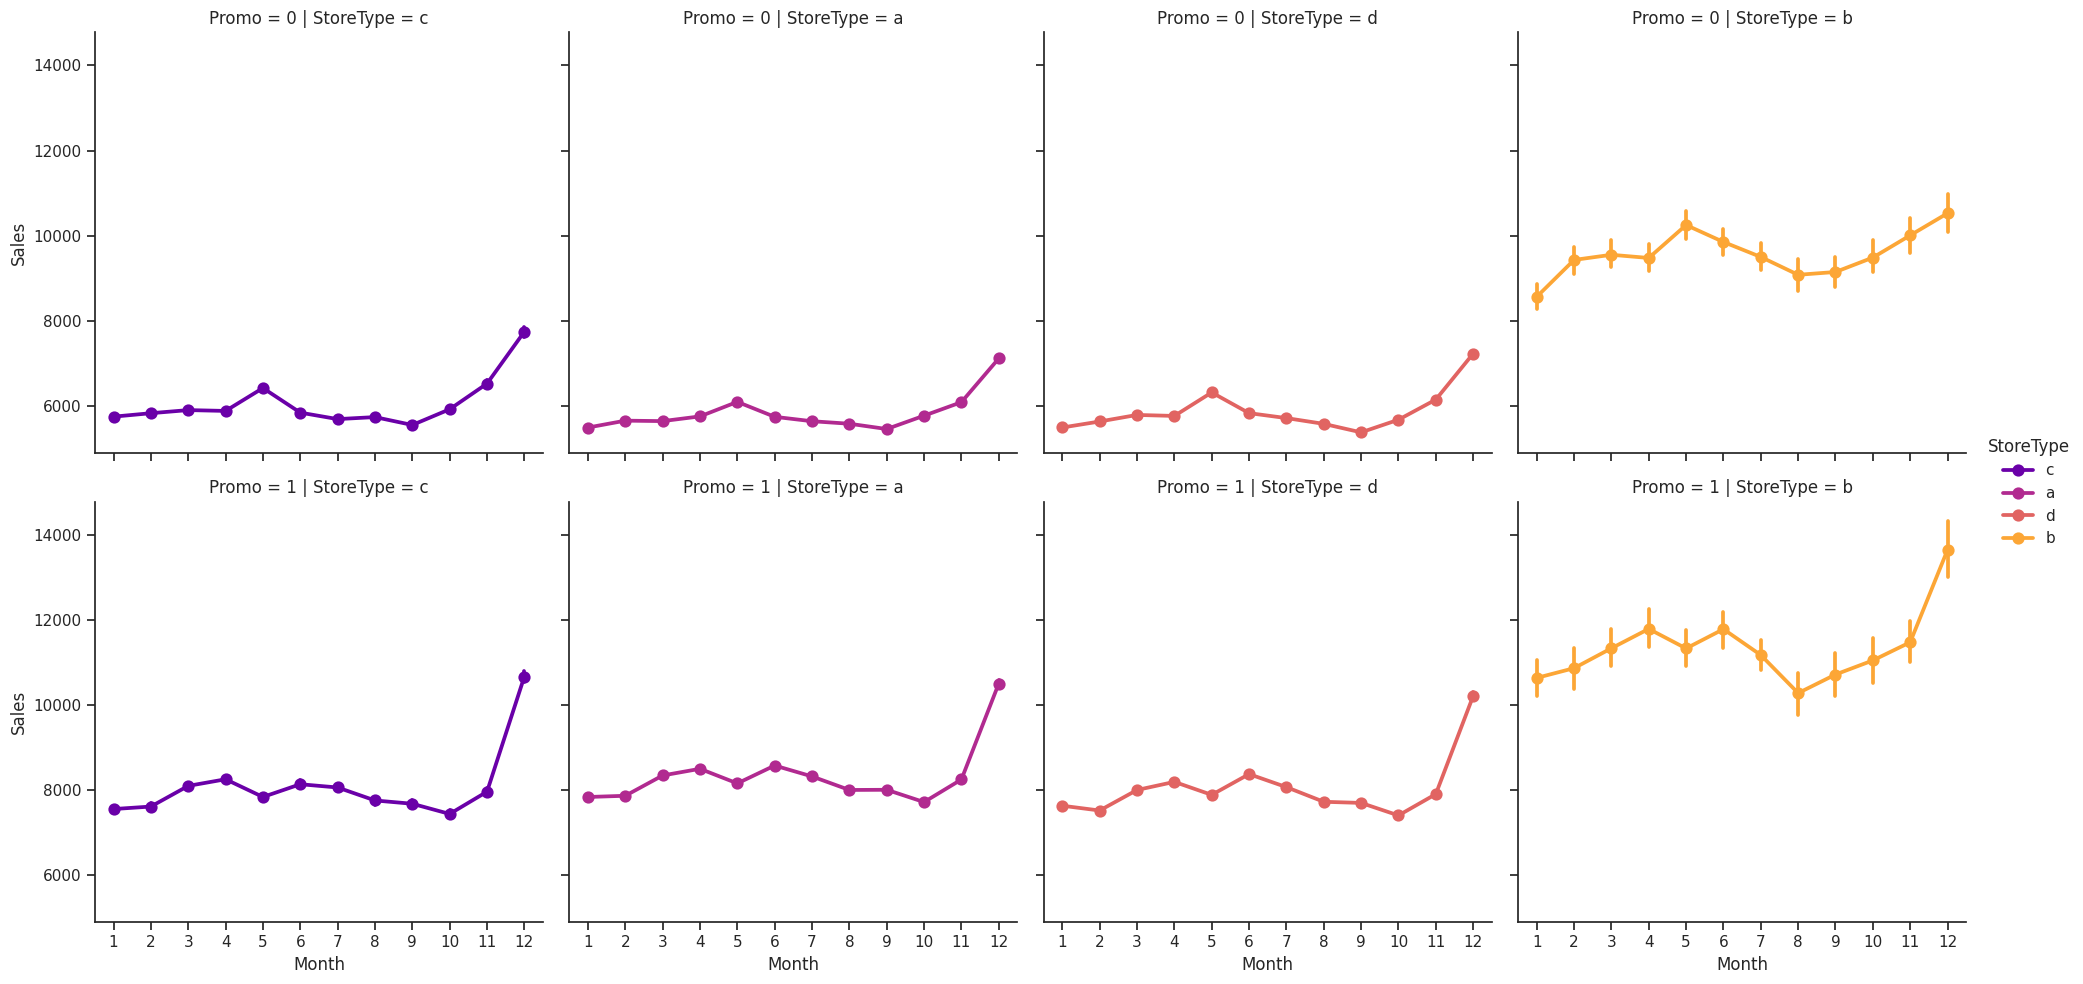

In [ ]:
sns.catplot(data = train_store, x = 'Month', y = "Sales",
               col = 'StoreType',
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo',
               kind = 'point',
               color = c)



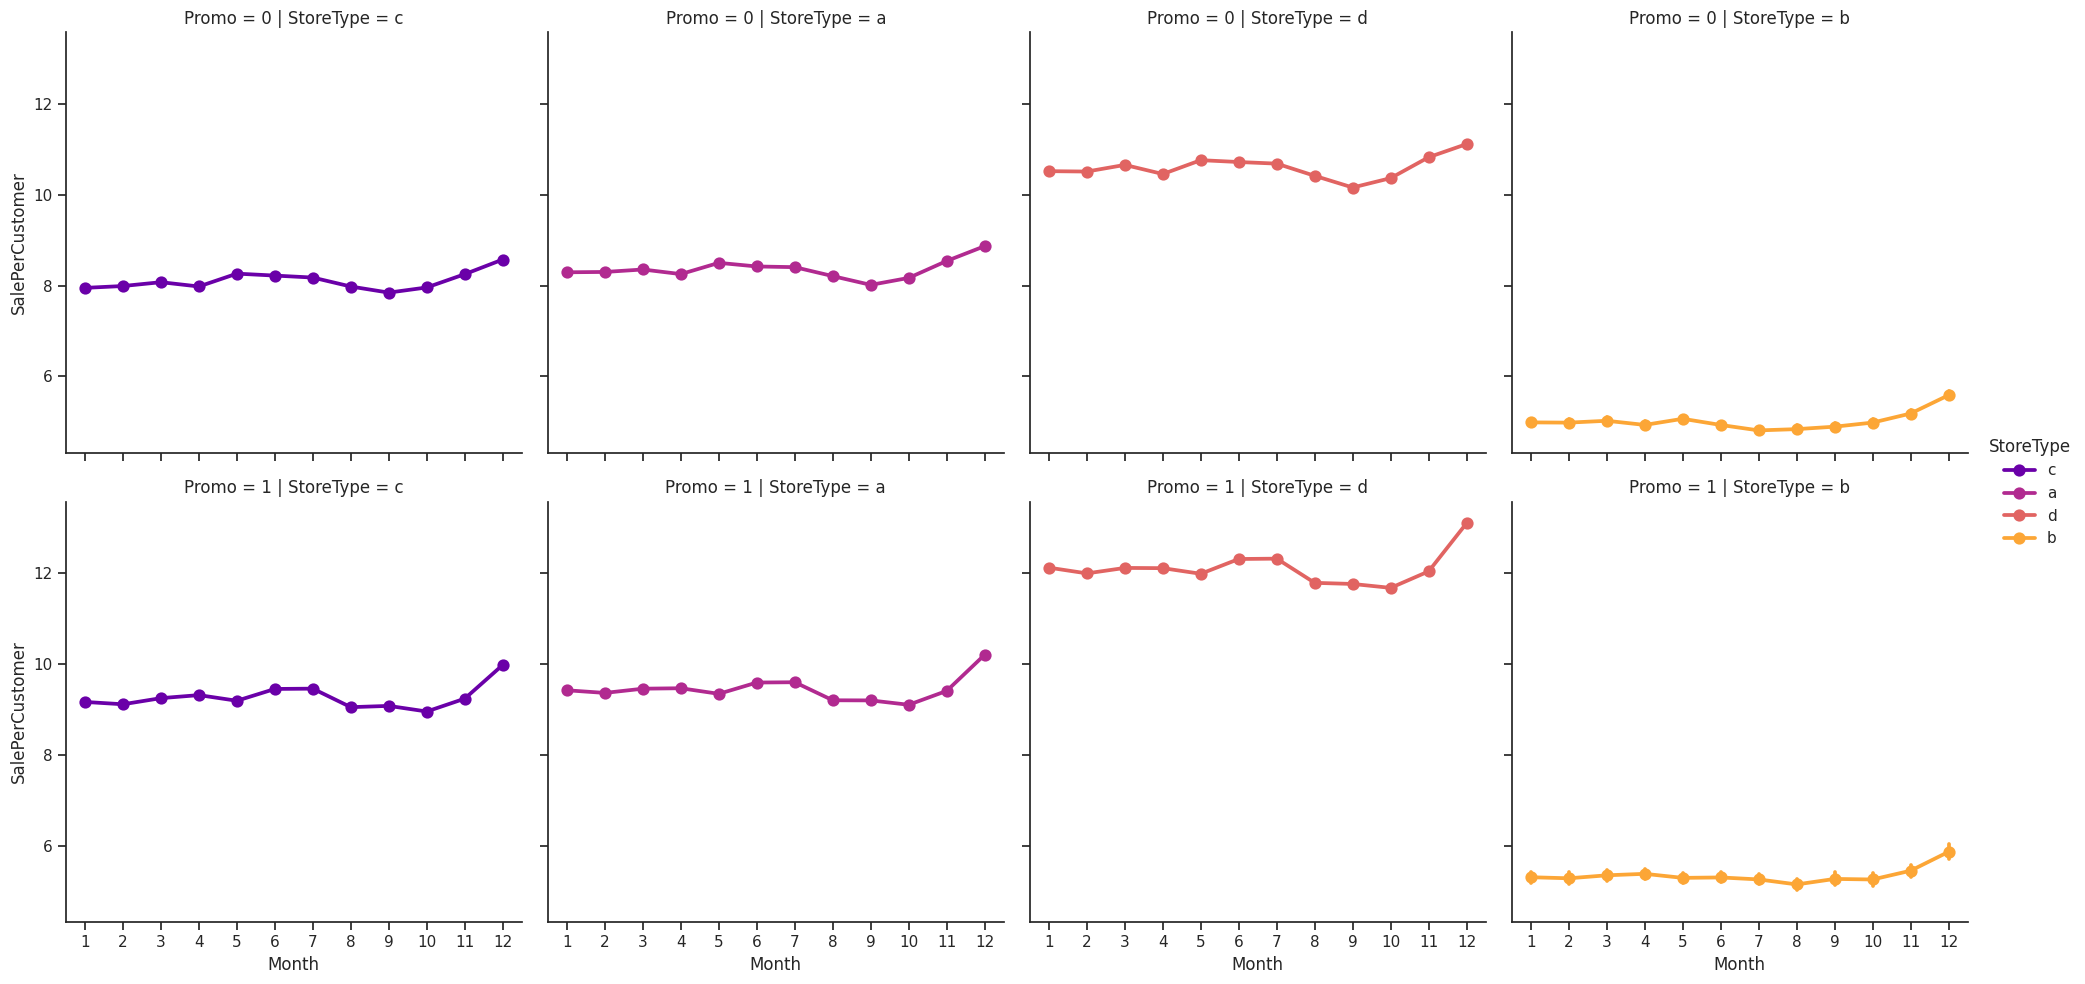

In [ ]:
# sale per customer trends
sns.catplot(data = train_store, x = 'Month', y = "SalePerCustomer",
               col = 'StoreType',
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo',
               kind = 'point',
               color = c)

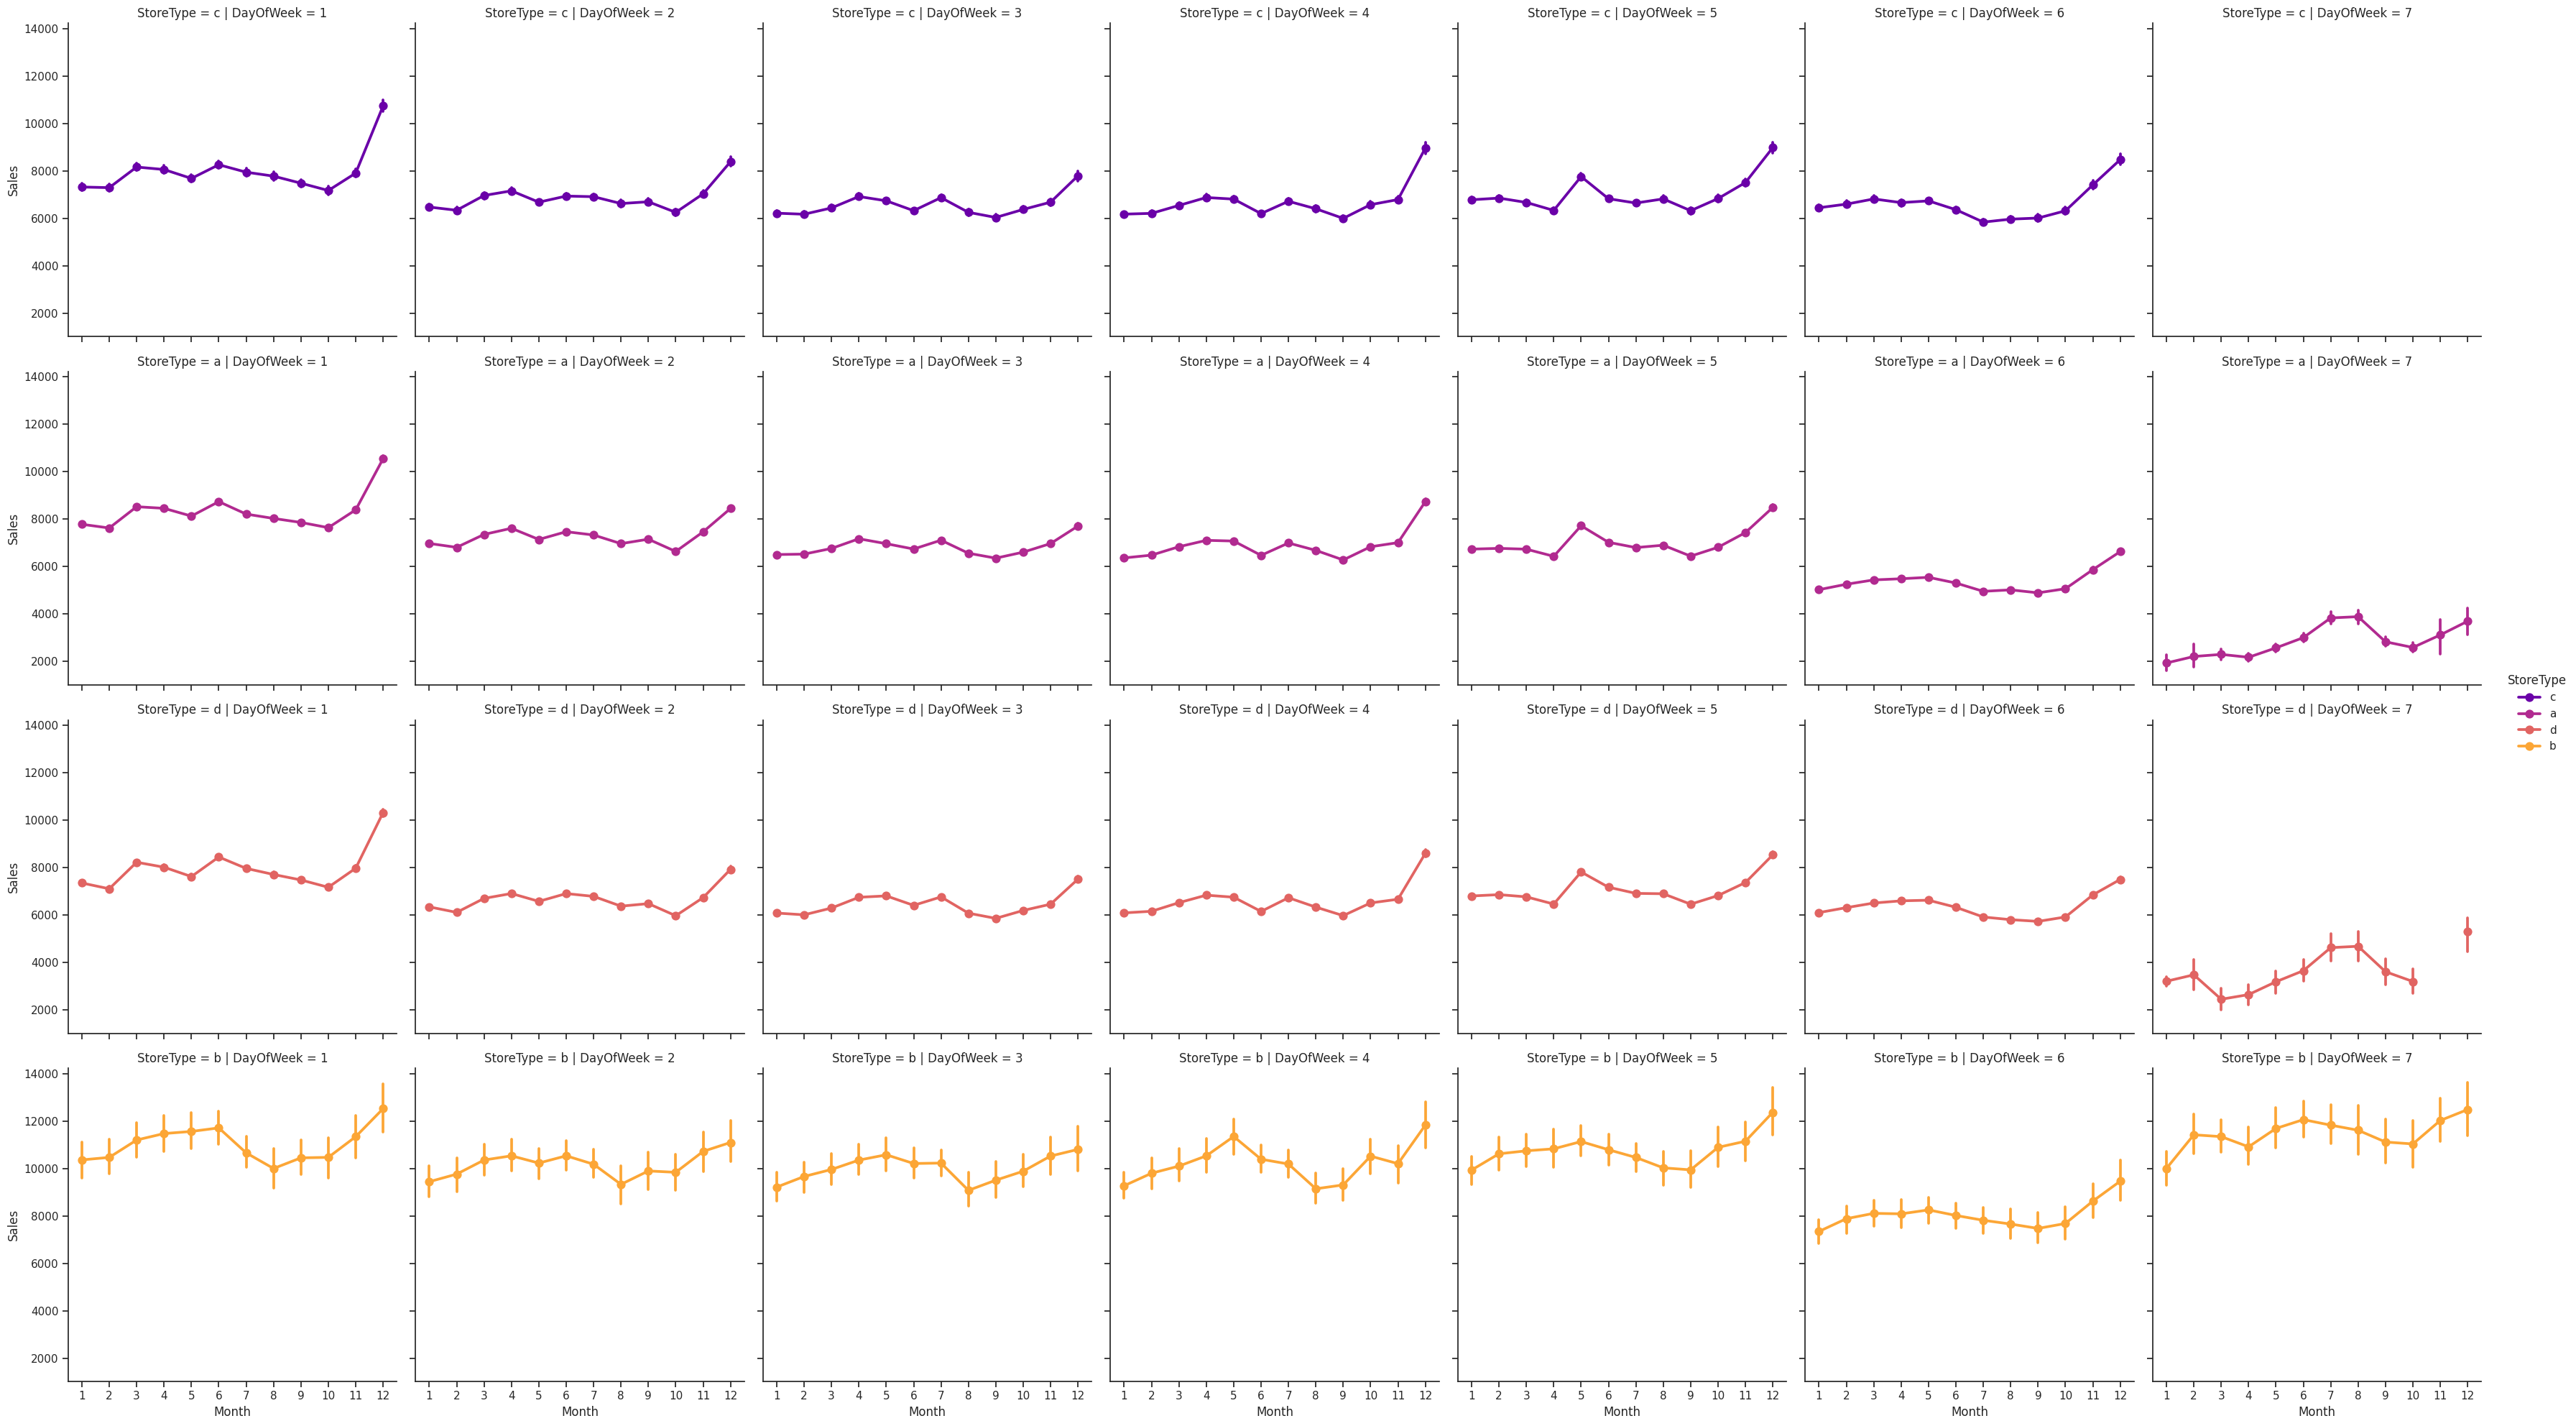

In [ ]:
# customers
sns.catplot(data = train_store, x = 'Month', y = "Sales",
               col = 'DayOfWeek',
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StoreType',
               kind = 'point',
               color = c)

In [ ]:

train_store[(train_store.Open == 1) & (train_store.DayOfWeek == 7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  931,  948, 1045, 1081, 1097, 1099,  877])

In [ ]:
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)
train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekOfYear - train_store.Promo2SinceWeek) / 4.0

train_store.fillna(0, inplace = True)

train_store.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

Sales    Customers     PromoOpen  CompetitionOpen
StoreType                                                          
a           6925.697986   795.422370  12918.492198      7115.514452
b          10233.380141  2022.211825  17199.328069     11364.495244
c           6933.126425   815.538073  12158.636107      6745.418694
d           6822.300064   606.353935  10421.916846      9028.526526

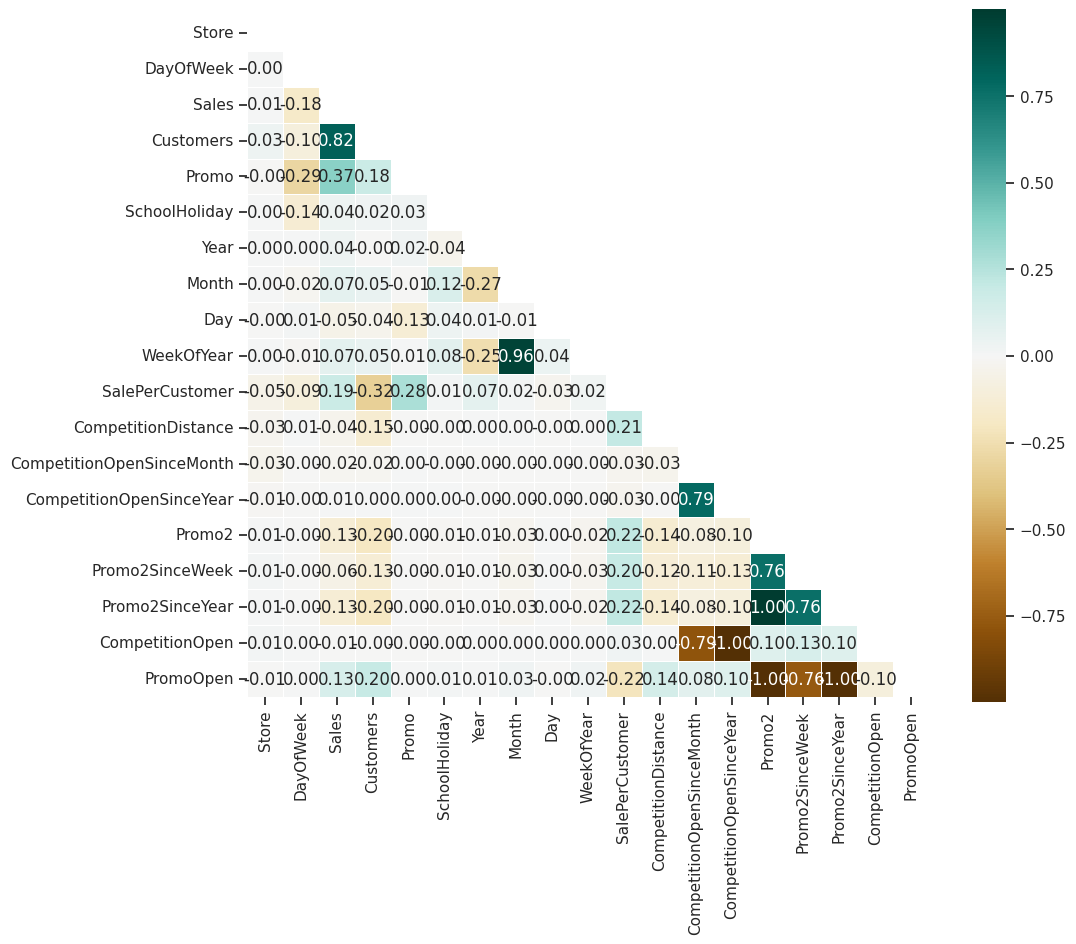

In [ ]:

numeric_features = train_store.select_dtypes(include=np.number).columns
numeric_features = numeric_features.drop('Open') if 'Open' in numeric_features else numeric_features

# Calculate correlation matrix
corr_all = train_store[numeric_features].corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask, annot = True, square = True, linewidths = 0.5, ax = ax, cmap = "BrBG", fmt='.2f')
plt.show()

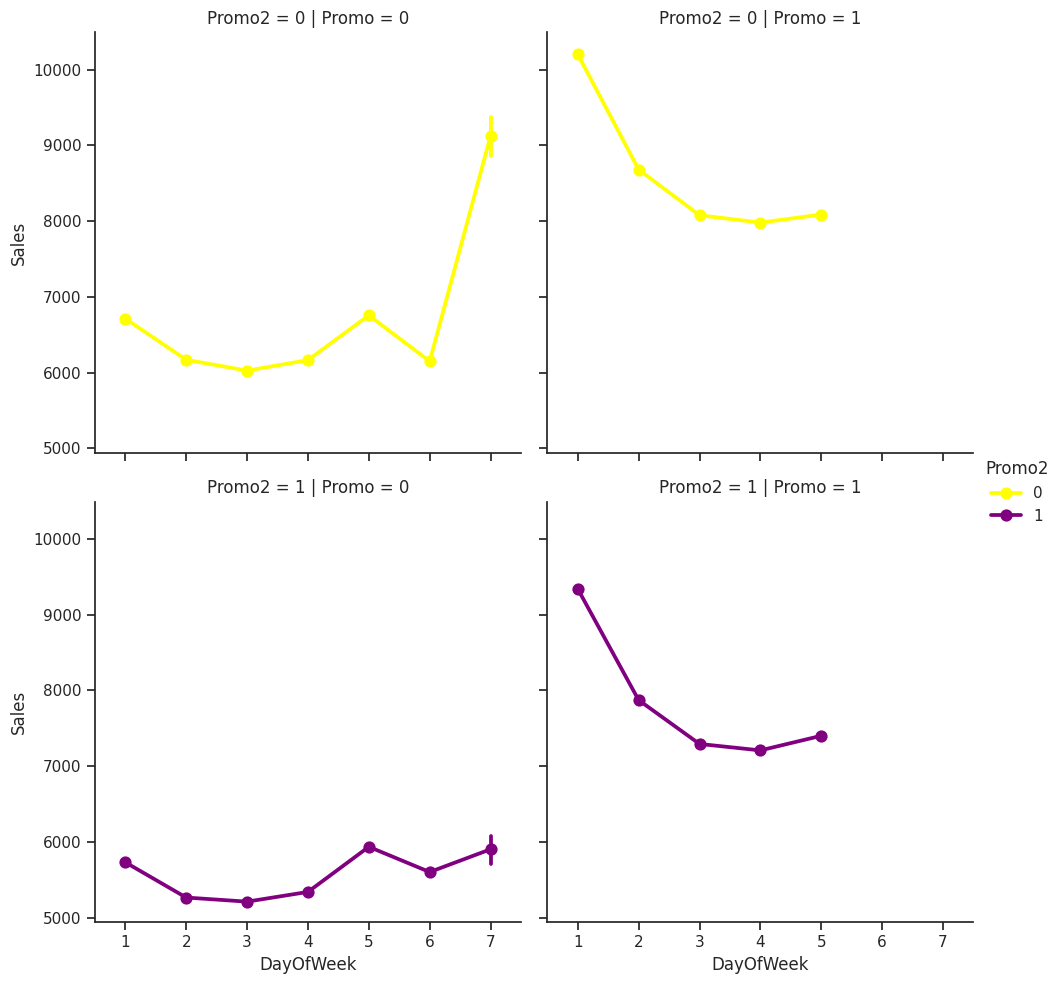

In [ ]:
# sale per customer trends
sns.catplot(data = train_store, x = 'DayOfWeek', y = "Sales",
               col = 'Promo',
               row = 'Promo2',
               hue = 'Promo2',
               kind = 'point',
               palette =['yellow','purple'])

In [ ]:
train_store.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0      1          5   5263        555     1      1            0   
1      2          5   6064        625     1      1            0   
2      3          5   8314        821     1      1            0   
3      4          5  13995       1498     1      1            0   
4      5          5   4822        559     1      1            0   

   SchoolHoliday  Year  Month  ...  Assortment  CompetitionDistance  \
0              1  2015      7  ...           a               1270.0   
1              1  2015      7  ...           a                570.0   
2              1  2015      7  ...           a              14130.0   
3              1  2015      7  ...           c                620.0   
4              1  2015      7  ...           a              29910.0   

   CompetitionOpenSinceMonth CompetitionOpenSinceYear Promo2  Promo2SinceWeek  \
0                        9.0                   2008.0      0              0.0   
1                       11.0                   2007.0      1             13.0   
2                       12.0                   2006.0      1             14.0   
3                        9.0                   2009.0      0              0.0   
4                        4.0                   2015.0      0              0.0   

   Promo2SinceYear    PromoInterval  CompetitionOpen  PromoOpen  
0              0.0                0             82.0   24187.75  
1           2010.0  Jan,Apr,Jul,Oct             92.0       64.5  
2           2011.0  Jan,Apr,Jul,Oct            103.0      52.25  
3              0.0                0             70.0   24187.75  
4              0.0                0              3.0   24187.75  

[5 rows x 24 columns]

In [ ]:
store.head(50)

Store StoreType Assortment  CompetitionDistance  \
0       1         c          a               1270.0   
1       2         a          a                570.0   
2       3         a          a              14130.0   
3       4         c          c                620.0   
4       5         a          a              29910.0   
5       6         a          a                310.0   
6       7         a          c              24000.0   
7       8         a          a               7520.0   
8       9         a          c               2030.0   
9      10         a          a               3160.0   
10     11         a          c                960.0   
11     12         a          c               1070.0   
12     13         d          a                310.0   
13     14         a          a               1300.0   
14     15         d          c               4110.0   
15     16         a          c               3270.0   
16     17         a          a                 50.0   
17     18         d          c              13840.0   
18     19         a          c               3240.0   
19     20         d          a               2340.0   
20     21         c          c                550.0   
21     22         a          a               1040.0   
22     23         d          a               4060.0   
23     24         a          c               4590.0   
24     25         c          a                430.0   
25     26         d          a               2300.0   
26     27         a          a                 60.0   
27     28         a          a               1200.0   
28     29         d          c               2170.0   
29     30         a          a                 40.0   
30     31         d          c               9800.0   
31     32         a          a               2910.0   
32     33         a          c               1320.0   
33     34         c          a               2240.0   
34     35         d          c               7660.0   
35     36         a          c                540.0   
36     37         c          a               4230.0   
37     38         d          a               1090.0   
38     39         a          a                260.0   
39     40         a          a                180.0   
40     41         d          c               1180.0   
41     42         a          c                290.0   
42     43         d          a               4880.0   
43     44         a          a                540.0   
44     45         d          a               9710.0   
45     46         c          a               1200.0   
46     47         a          c                270.0   
47     48         a          a               1060.0   
48     49         d          c              18010.0   
49     50         d          a               6260.0   

    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                         9.0                    2008.0       0   
1                        11.0                    2007.0       1   
2                        12.0                    2006.0       1   
3                         9.0                    2009.0       0   
4                         4.0                    2015.0       0   
5                        12.0                    2013.0       0   
6                         4.0                    2013.0       0   
7                        10.0                    2014.0       0   
8                         8.0                    2000.0       0   
9                         9.0                    2009.0       0   
10                       11.0                    2011.0       1   
11                        0.0                       0.0       1   
12                        0.0                       0.0       1   
13                        3.0                    2014.0       1   
14                        3.0                    2010.0       1   
15                        0.0                       0.0       0   
16                       12.0                    2005.0    

<Axes: xlabel='Date'>

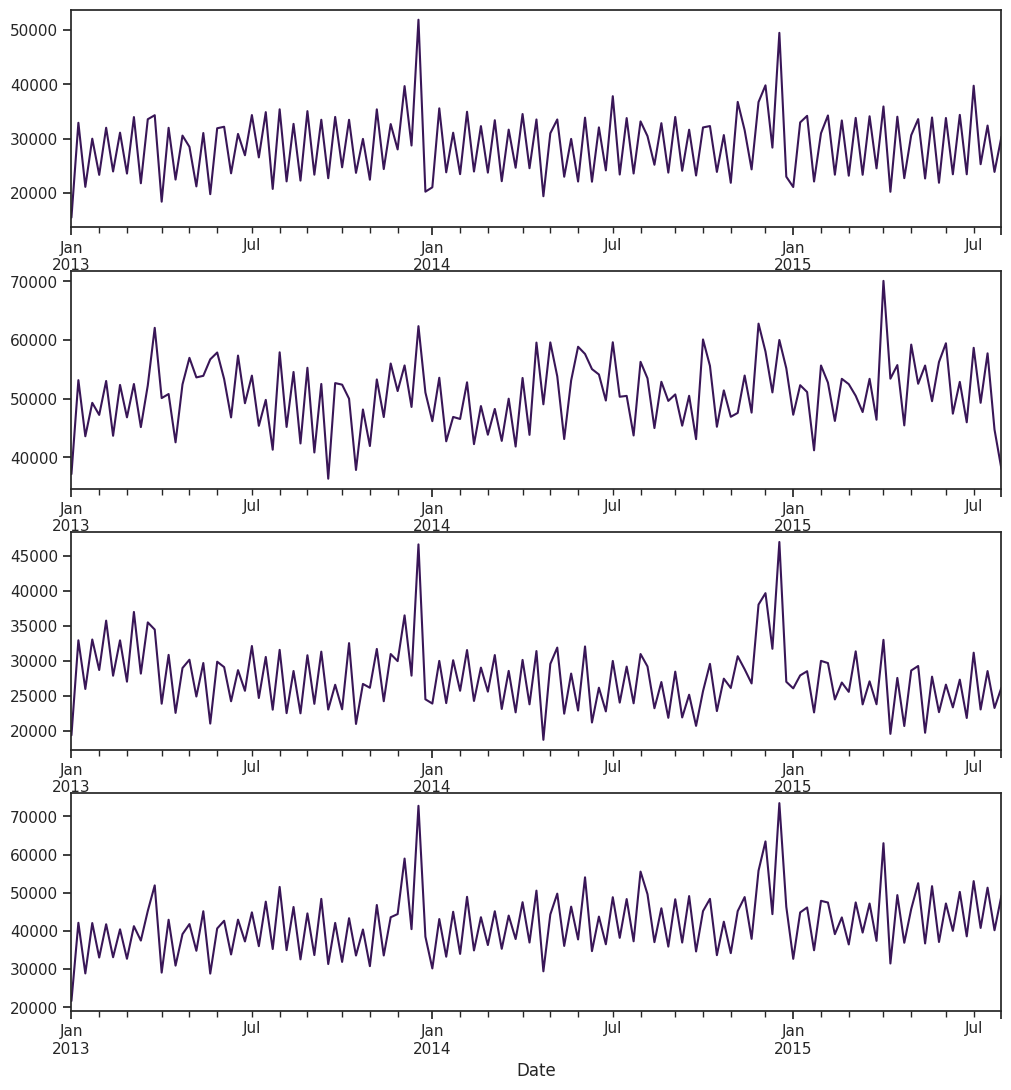

In [ ]:
# input should be float type
train['Sales'] = train['Sales'] * 1.0

# store types
sales_a = train[train.Store == 2]['Sales']
sales_b = train[train.Store == 85]['Sales']
sales_c = train[train.Store == 1]['Sales']
sales_d = train[train.Store == 49]['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# store types
sales_a.resample('W').sum().plot(color = c, ax = ax1)
sales_b.resample('W').sum().plot(color = c, ax = ax2)
sales_c.resample('W').sum().plot(color = c, ax = ax3)
sales_d.resample('W').sum().plot(color = c, ax = ax4)

<Axes: xlabel='Date'>

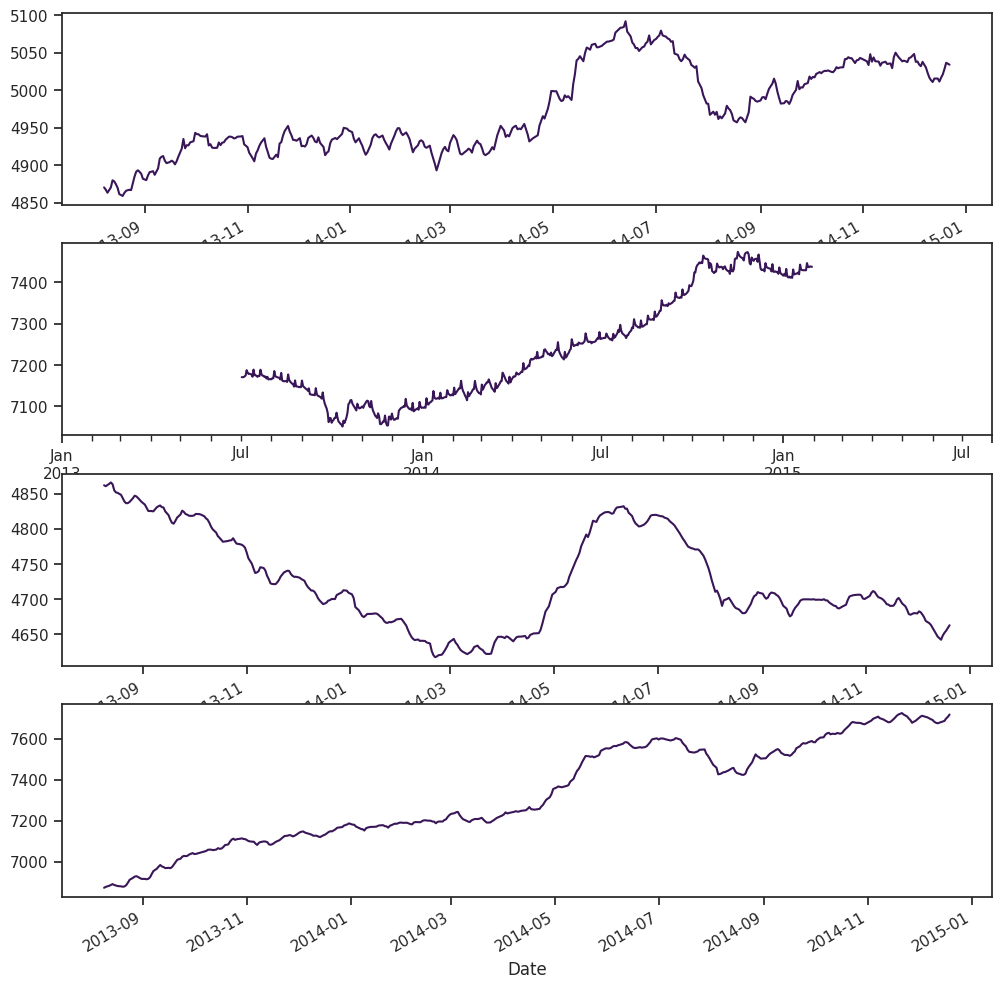

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# monthly
decomposition_a = seasonal_decompose(sales_a, model = 'additive', period = 365)
decomposition_a.trend.plot(color = c, ax = ax1)

decomposition_b = seasonal_decompose(sales_b, model = 'additive', period = 365)
decomposition_b.trend.plot(color = c, ax = ax2)

decomposition_c = seasonal_decompose(sales_c, model = 'additive', period = 365)
decomposition_c.trend.plot(color = c, ax = ax3)

decomposition_d = seasonal_decompose(sales_d, model = 'additive', period = 365)
decomposition_d.trend.plot(color = c, ax = ax4)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

    print(dfoutput)

In [ ]:
from scipy import stats
from scipy.stats import normaltest
def residual_plot(model):

    resid = model.resid
    print(normaltest(resid))

    fig = plt.figure(figsize=(12,8))
    ax0 = fig.add_subplot(111)

    sns.distplot(resid ,fit = stats.norm, ax = ax0)
    (mu, sigma) = stats.norm.fit(resid)

    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title('Residual distribution')


    # ACF and PACF
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(model.resid, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(model.resid, lags=40, ax=ax2)


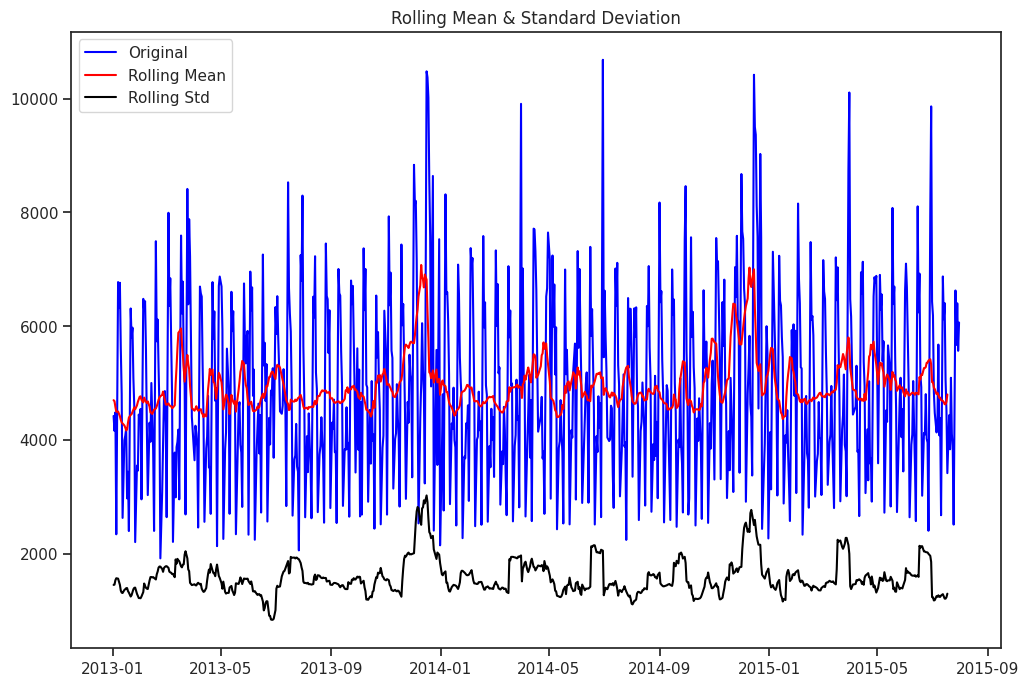

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -5.292708
p-value                          0.000006
#Lags Used                      17.000000
Number of Observations Used    766.000000
Critical Value (1%)             -3.438916
Critical Value (5%)             -2.865321
Critical Value (10%)            -2.568783
dtype: float64


In [ ]:
test_stationarity(sales_a)

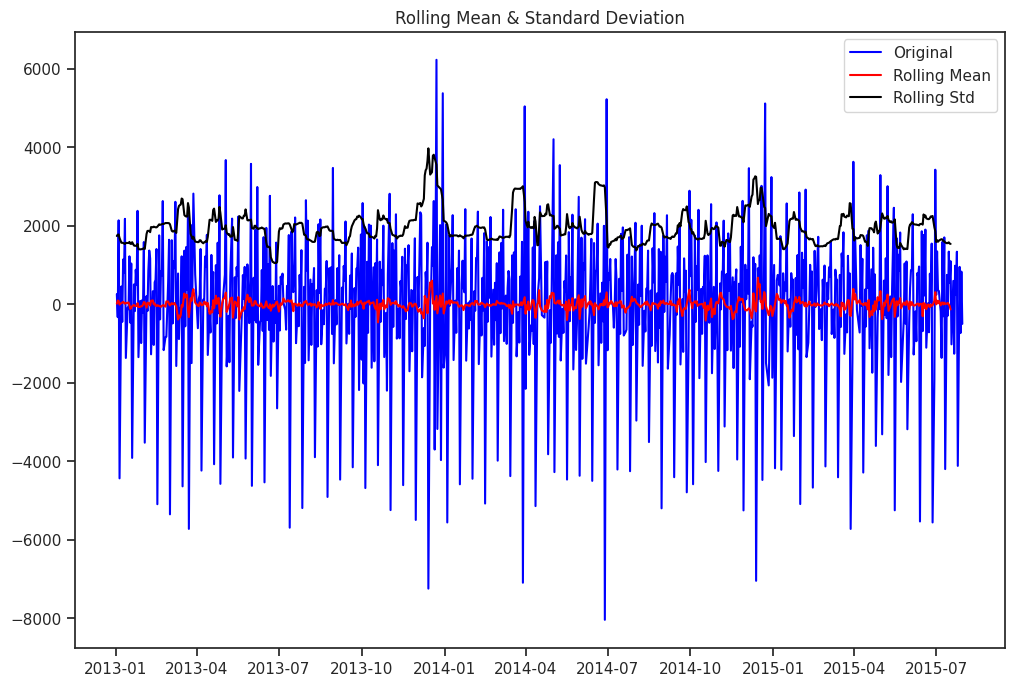

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.219964e+01
p-value                        1.231658e-22
#Lags Used                     1.600000e+01
Number of Observations Used    7.660000e+02
Critical Value (1%)           -3.438916e+00
Critical Value (5%)           -2.865321e+00
Critical Value (10%)          -2.568783e+00
dtype: float64


In [ ]:
first_diff_a = sales_a - sales_a.shift(1)
first_diff_a = first_diff_a.dropna(inplace = False)
test_stationarity(first_diff_a, window = 12)

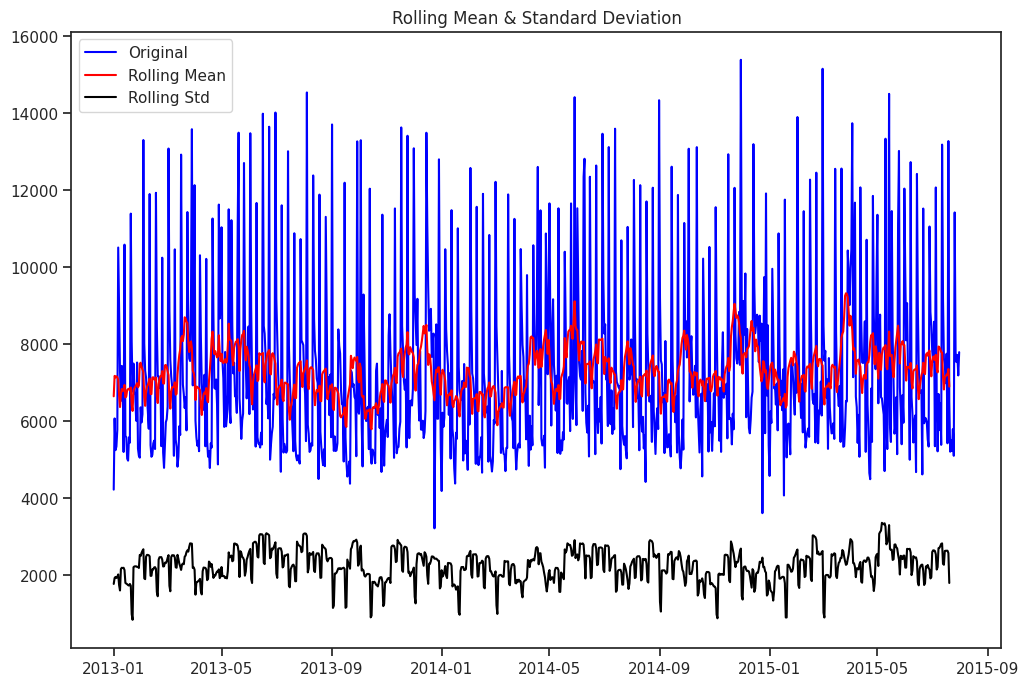

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -4.934210
p-value                          0.000030
#Lags Used                      20.000000
Number of Observations Used    921.000000
Critical Value (1%)             -3.437470
Critical Value (5%)             -2.864683
Critical Value (10%)            -2.568444
dtype: float64


In [ ]:
test_stationarity(sales_b)

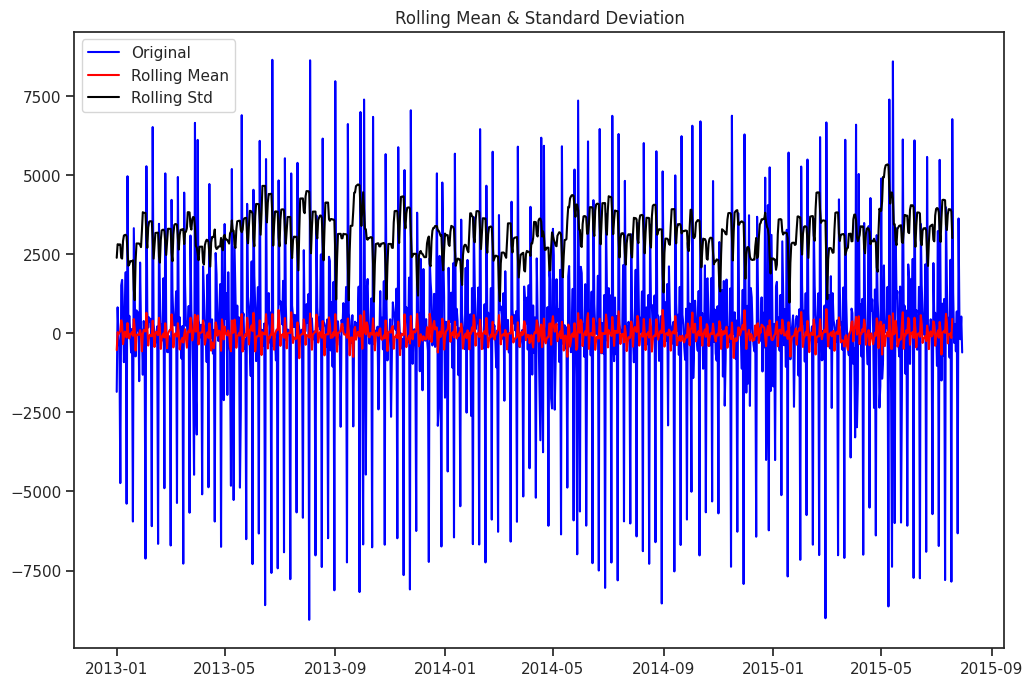

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.102941e+01
p-value                        5.718144e-20
#Lags Used                     2.000000e+01
Number of Observations Used    9.200000e+02
Critical Value (1%)           -3.437478e+00
Critical Value (5%)           -2.864687e+00
Critical Value (10%)          -2.568445e+00
dtype: float64


In [ ]:
first_diff_b = sales_b - sales_b.shift(1)
first_diff_b = first_diff_b.dropna(inplace = False)
test_stationarity(first_diff_b, window = 12)

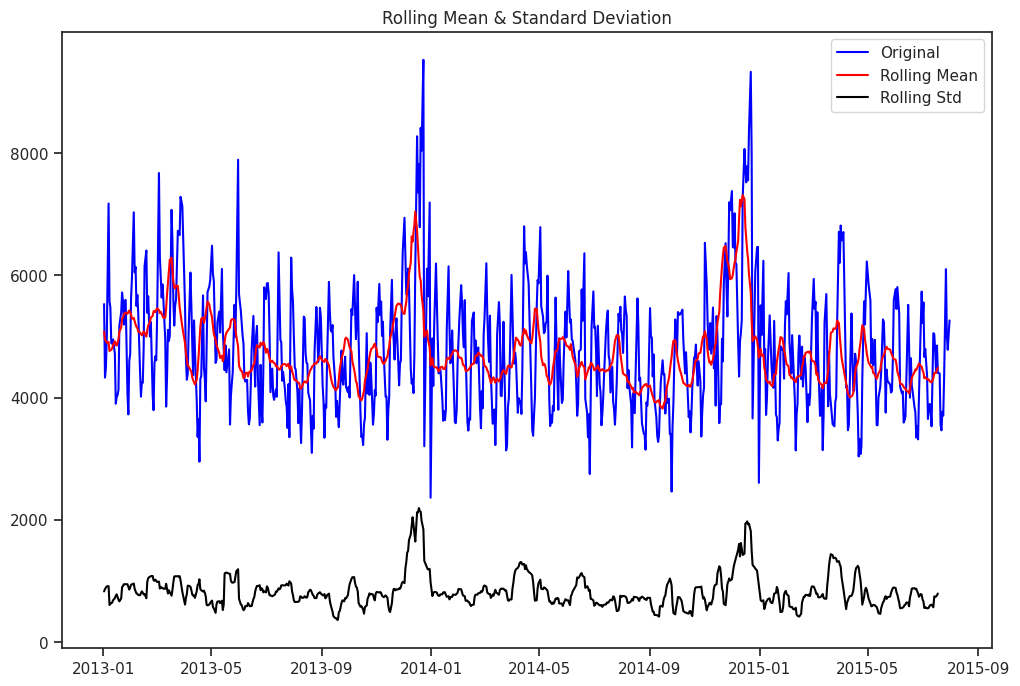

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -5.412786
p-value                          0.000003
#Lags Used                      13.000000
Number of Observations Used    767.000000
Critical Value (1%)             -3.438905
Critical Value (5%)             -2.865316
Critical Value (10%)            -2.568781
dtype: float64


In [ ]:
test_stationarity(sales_c)

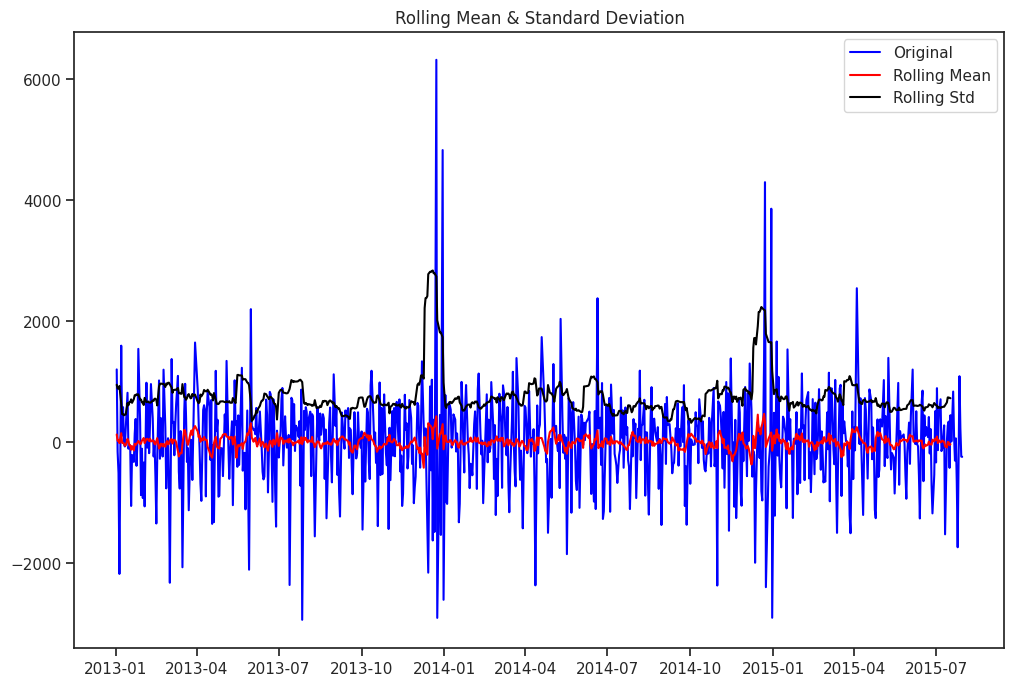

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.042084e+01
p-value                        1.706353e-18
#Lags Used                     2.000000e+01
Number of Observations Used    7.590000e+02
Critical Value (1%)           -3.438995e+00
Critical Value (5%)           -2.865355e+00
Critical Value (10%)          -2.568802e+00
dtype: float64


In [ ]:
first_diff_c = sales_c - sales_c.shift(1)
first_diff_c = first_diff_c.dropna(inplace = False)
test_stationarity(first_diff_c, window = 12)

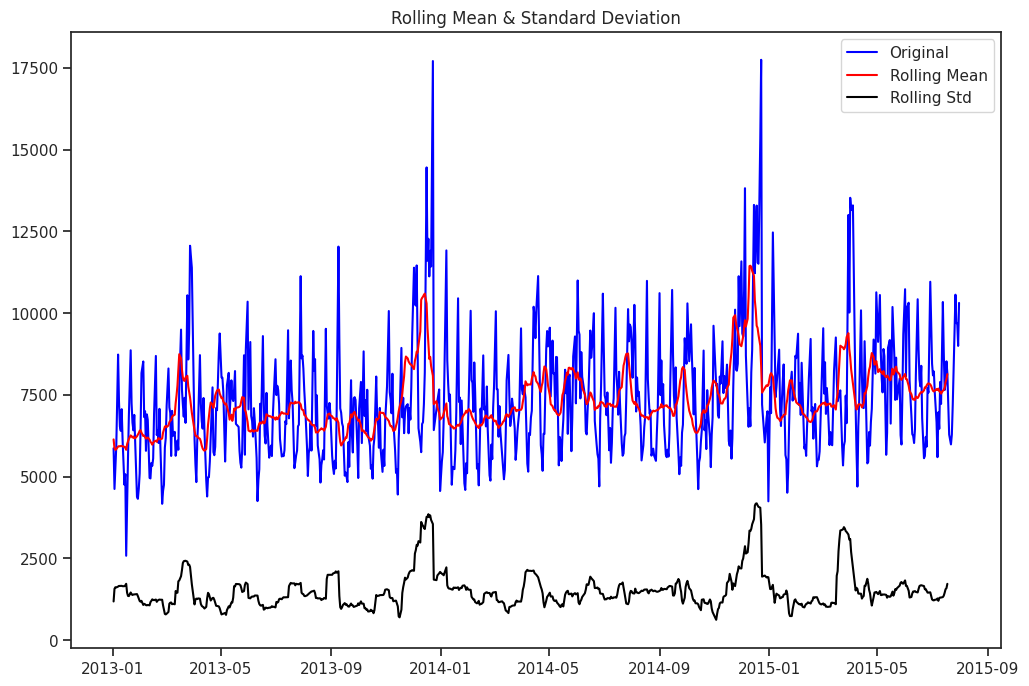

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -4.917231
p-value                          0.000032
#Lags Used                      12.000000
Number of Observations Used    764.000000
Critical Value (1%)             -3.438938
Critical Value (5%)             -2.865330
Critical Value (10%)            -2.568788
dtype: float64


In [ ]:
test_stationarity(sales_d)

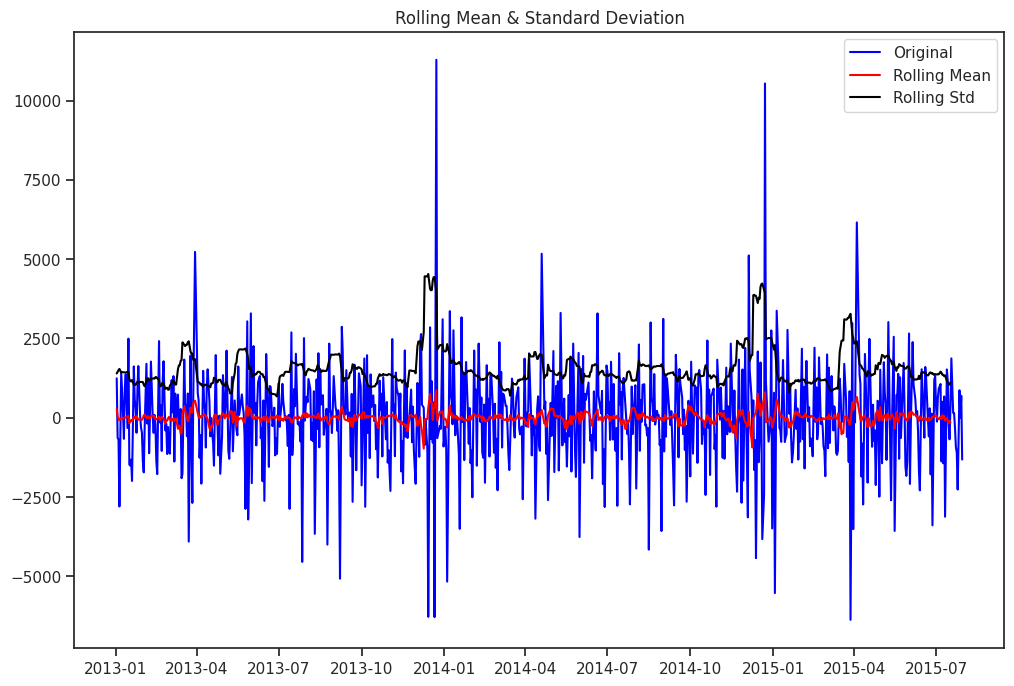

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.228456e+01
p-value                        8.080617e-23
#Lags Used                     1.300000e+01
Number of Observations Used    7.620000e+02
Critical Value (1%)           -3.438961e+00
Critical Value (5%)           -2.865340e+00
Critical Value (10%)          -2.568794e+00
dtype: float64


In [ ]:
first_diff_d = sales_d - sales_d.shift(1)
first_diff_d = first_diff_d.dropna(inplace = False)
test_stationarity(first_diff_d, window = 12)

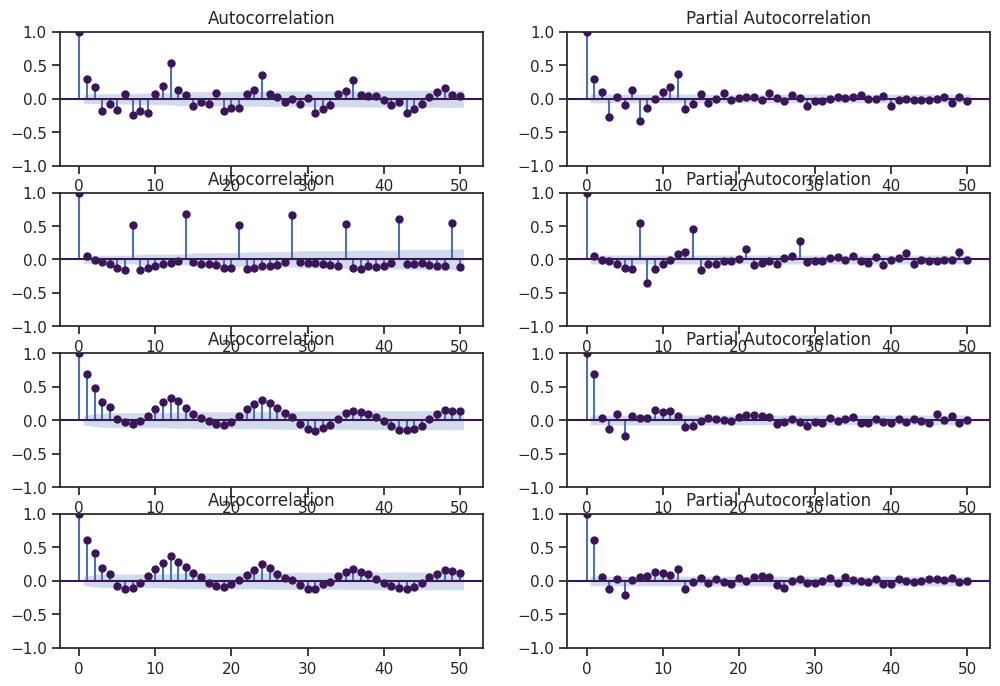

In [ ]:
# figure for subplots
plt.figure(figsize = (12, 8))

# acf and pacf for A
plt.subplot(421); plot_acf(sales_a, lags = 50, ax = plt.gca(), color = c)
plt.subplot(422); plot_pacf(sales_a, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for B
plt.subplot(423); plot_acf(sales_b, lags = 50, ax = plt.gca(), color = c)
plt.subplot(424); plot_pacf(sales_b, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for C
plt.subplot(425); plot_acf(sales_c, lags = 50, ax = plt.gca(), color = c)
plt.subplot(426); plot_pacf(sales_c, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for D
plt.subplot(427); plot_acf(sales_d, lags = 50, ax = plt.gca(), color = c)
plt.subplot(428); plot_pacf(sales_d, lags = 50, ax = plt.gca(), color = c)

plt.show()


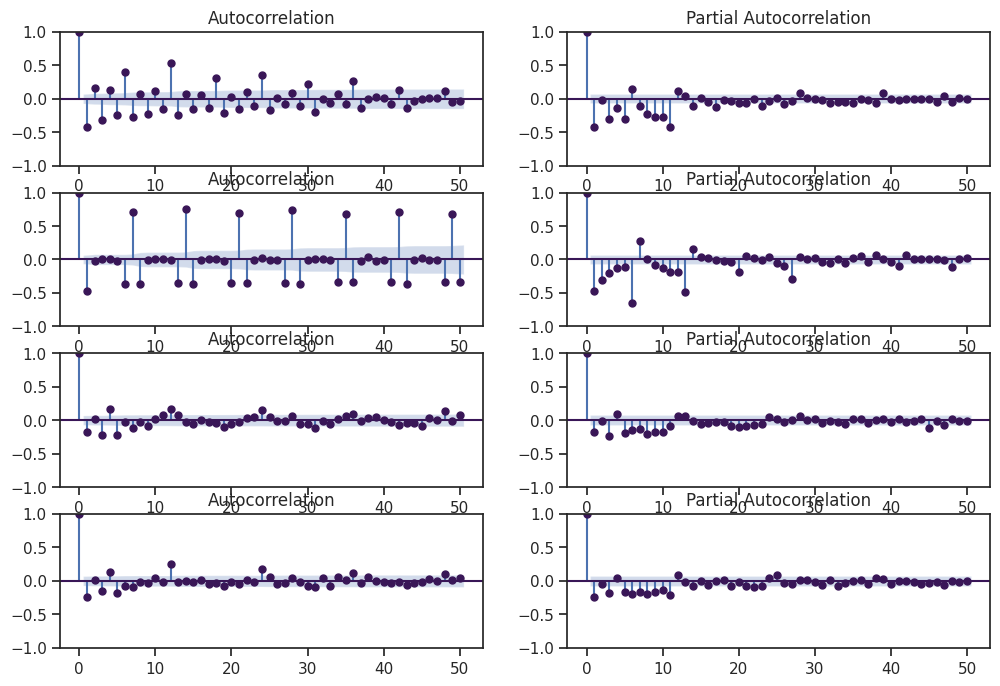

In [ ]:
# figure for subplots
plt.figure(figsize = (12, 8))

# acf and pacf for A
plt.subplot(421); plot_acf(first_diff_a, lags = 50, ax = plt.gca(), color = c)
plt.subplot(422); plot_pacf(first_diff_a, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for B
plt.subplot(423); plot_acf(first_diff_b, lags = 50, ax = plt.gca(), color = c)
plt.subplot(424); plot_pacf(first_diff_b, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for C
plt.subplot(425); plot_acf(first_diff_c, lags = 50, ax = plt.gca(), color = c)
plt.subplot(426); plot_pacf(first_diff_c, lags = 50, ax = plt.gca(), color = c)


# acf and pacf for D
plt.subplot(427); plot_acf(first_diff_d, lags = 50, ax = plt.gca(), color = c)
plt.subplot(428); plot_pacf(first_diff_d, lags = 50, ax = plt.gca(), color = c)

plt.show()

In [ ]:
import itertools
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

def find_best_seasonal_order(data, seasonal_pdq_range, seasonal_period, metric="aic"):
    P_range = seasonal_pdq_range.get('P', [0, 1])
    D_range = seasonal_pdq_range.get('D', [0, 1])
    Q_range = seasonal_pdq_range.get('Q', [0, 1])

    best_score = np.inf
    best_seasonal_order = None

    for seasonal_order in itertools.product(P_range, D_range, Q_range):
        try:
            model = sm.tsa.SARIMAX(data,
                                   order=(0, 0, 0),
                                   seasonal_order=(seasonal_order[0], seasonal_order[1], seasonal_order[2], seasonal_period),
                                   enforce_stationarity=False,
                                   enforce_invertibility=False)
            results = model.fit(disp=False)

            score = results.aic if metric == "aic" else results.bic

            if score < best_score:
                best_score = score
                best_seasonal_order = seasonal_order

        except Exception as e:
            continue

    return best_seasonal_order + (seasonal_period,), best_score

seasonal_pdq_range = {
    'P': [0, 1, 2],
    'D': [0, 1],
    'Q': [0, 1, 2]
}
# seasonal_period = 12
# best_seasonal_order1, best_score1 = find_best_seasonal_order(sales_a, seasonal_pdq_range, seasonal_period, metric="aic")

# print("Best Seasonal Order for Store a:", best_seasonal_order1) #1,1,2,12
# print("Best AIC Score:", best_score1)

# best_seasonal_order2, best_score2 = find_best_seasonal_order(sales_b, seasonal_pdq_range, seasonal_period, metric="aic")

# print("Best Seasonal Order for Store b:", best_seasonal_order2) #1,1,2,12
# print("Best AIC Score for Store b:", best_score2)

# best_seasonal_order3, best_score3 = find_best_seasonal_order(sales_c, seasonal_pdq_range, seasonal_period, metric="aic")

# print("Best Seasonal Order for Store c:", best_seasonal_order3) #2,1,2,12
# print("Best AIC Score for Store c:", best_score3)

# best_seasonal_order4, best_score4 = find_best_seasonal_order(sales_d, seasonal_pdq_range, seasonal_period, metric="aic")

# print("Best Seasonal Order for Store d:", best_seasonal_order4) #1,1,2,12
# print("Best AIC Score for Store d:", best_score4)


In [ ]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

def get_best_sarima_params(time_series, seasonal_order=(0, 0, 0, 0), p_range=(0, 3), d_range=(0, 2), q_range=(0, 3), criteria='aic'):

    best_score, best_params = float('inf'), None

    p_values = range(p_range[0], p_range[1] + 1)
    d_values = range(d_range[0], d_range[1] + 1)
    q_values = range(q_range[0], q_range[1] + 1)

    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:

            model = SARIMAX(time_series, order=(p, d, q), seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
            model_fit = model.fit(disp=False)
            score = getattr(model_fit, criteria)

            if score < best_score:
                best_score, best_params = score, (p, d, q)
        except Exception as e:
            continue

    return {'p': best_params[0], 'd': best_params[1], 'q': best_params[2], 'criteria_score': best_score}




In [ ]:
# best_params = get_best_sarima_params(sales_d, seasonal_order=(2, 1, 0, 12), p_range=(0, 2), d_range=(0, 2), q_range=(0, 2))
# print("Best parameters:", best_params) #2,1,1

In [ ]:
# best_params = get_best_sarima_params(sales_c, seasonal_order=(2, 1, 0, 12), p_range=(0, 2), d_range=(0, 2), q_range=(0, 2))
# print("Best parameters:", best_params) #2,1,2

In [ ]:
# best_params = get_best_sarima_params(sales_b, seasonal_order=(2, 1, 0, 12), p_range=(0, 2), d_range=(0, 2), q_range=(0, 2))
# print("Best parameters:", best_params) #2,0,2

In [ ]:
# best_params = get_best_sarima_params(sales_a, seasonal_order=(2, 1, 0, 12), p_range=(0, 2), d_range=(0, 2), q_range=(0, 2))
# print("Best parameters:", best_params) #2,0,2

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

test_size_ratio = 0.2
test_size = int(len(sales_a) * test_size_ratio)

test1, train1 = sales_a[:test_size], sales_a[test_size:]
test2, train2 = sales_b[:test_size], sales_b[test_size:]
test3, train3 = sales_c[:test_size], sales_c[test_size:]
test4, train4 = sales_d[:test_size], sales_d[test_size:]

def evaluate_sarima_model(train, test, order, seasonal_order):
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)

    forecast = model_fit.forecast(steps=len(test))

    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)

    return rmse, mae, forecast

# # Example of using best SARIMA params for evaluation
# best_order = (1, 1, 1)  # Replace with the best 'order' you found
# seasonal_order = (2, 1, 0, 12)  # Replace with the best 'seasonal_order' you found

# Evaluate the model
# rmse1, mae1, predictions = evaluate_sarima_model(train1, test1, order=(2,0,2), seasonal_order=(1,1,2,12))
# rmse2, mae2, predictions = evaluate_sarima_model(train2, test2, order=(2,0,2), seasonal_order=(1,1,2,12))
# rmse3, mae3, predictions = evaluate_sarima_model(train3, test3, order=(2,1,2), seasonal_order=(2,1,2,12))
# rmse4, mae4, predictions = evaluate_sarima_model(train4, test4, order=(2,1,1), seasonal_order=(1,1,2,12))

# # Print evaluation metrics
# print(f"RMSE of Store a Sales : {rmse1}")
# print(f"MAE of Store a Sales : {mae1}")

# print(f"RMSE of Store b Sales : {rmse2}")
# print(f"MAE of Store b Sales : {mae2}")

# print(f"RMSE of Store c Sales : {rmse3}")
# print(f"MAE of Store c Sales : {mae3}")

# print(f"RMSE of Store d Sales : {rmse4}")
# print(f"MAE of Store d Sales : {mae4}")


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_rmse_mae(model, test_data):
    if test_data.empty:
        print("Error: Test data is empty.")
        return None, None

    try:
        predictions = model.predict(start=0, end=len(test_data)-1, dynamic=False)

        if len(predictions) != len(test_data):
            print("Error: Predictions length does not match test data length.")
            return None, None

        rmse = np.sqrt(mean_squared_error(test_data, predictions))
        mae = mean_absolute_error(test_data, predictions)

        print(f"RMSE: {rmse}")
        print(f"MAE: {mae}")
        return rmse, mae

    except IndexError as e:
        print("IndexError:", e)
        return None, None
    except Exception as e:
        print("An error occurred:", e)
        return None, None


In [ ]:
train1.tail()

Date
2013-01-07    6775.0
2013-01-05    2342.0
2013-01-04    4484.0
2013-01-03    4159.0
2013-01-02    4422.0
Name: Sales, dtype: float64

In [ ]:
test1.head()

Date
2015-07-31    6064.0
2015-07-30    5567.0
2015-07-29    6402.0
2015-07-28    5671.0
2015-07-27    6627.0
Name: Sales, dtype: float64

In [ ]:
# best_params = get_best_sarima_params(train1, seasonal_order=(1, 1, 2, 12), p_range=(0, 11), d_range=(0, 2), q_range=(0, 2))
# print("Best parameters:", best_params) #2,0,2

In [ ]:
best_params = get_best_sarima_params(train2, seasonal_order=(1, 1, 2, 12), p_range=(0, 11), d_range=(0, 2), q_range=(0, 2))
print("Best parameters:", best_params) #2,0,2

Best parameters: {'p': 9, 'd': 1, 'q': 1, 'criteria_score': 13292.091832034243}


In [ ]:
sarima_mod_a = sm.tsa.statespace.SARIMAX(train1, trend='n', order=(11,1,0), seasonal_order=(2,1,0,12)).fit()
print(sarima_mod_a.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  628
Model:             SARIMAX(11, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -5314.405
Date:                             Wed, 13 Nov 2024   AIC                          10656.811
Time:                                     09:57:36   BIC                          10718.713
Sample:                                          0   HQIC                         10680.881
                                             - 628                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6219      0.030    -20.841      0.000      -0.680      -0.563
ar.L2         -0.3774      

NormaltestResult(statistic=44.48755926042443, pvalue=2.1859954312077052e-10)


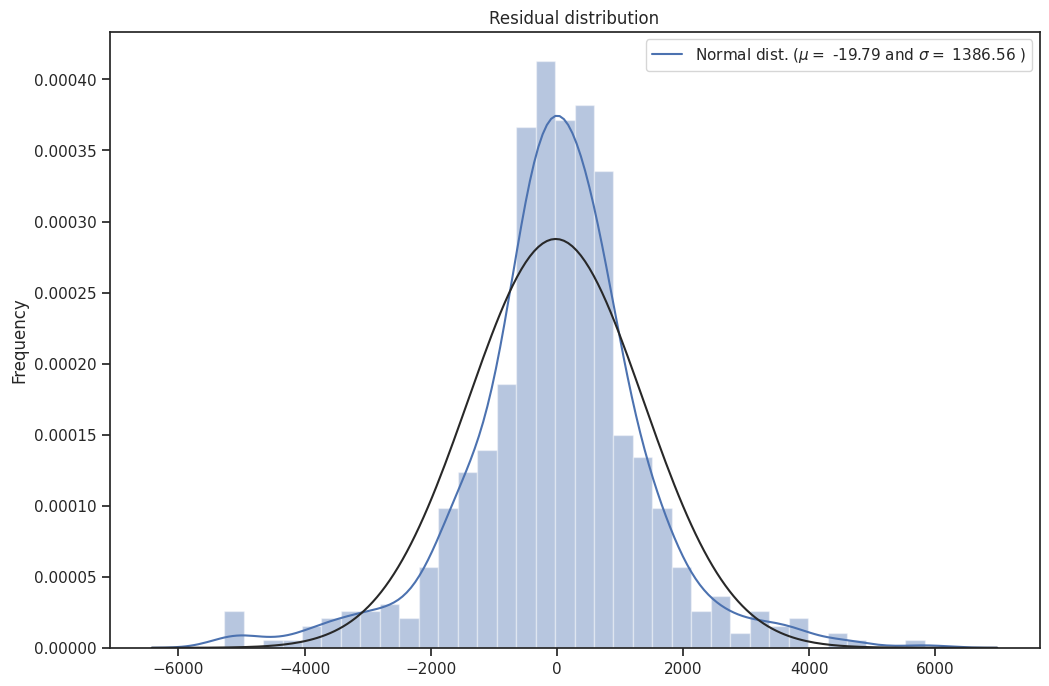

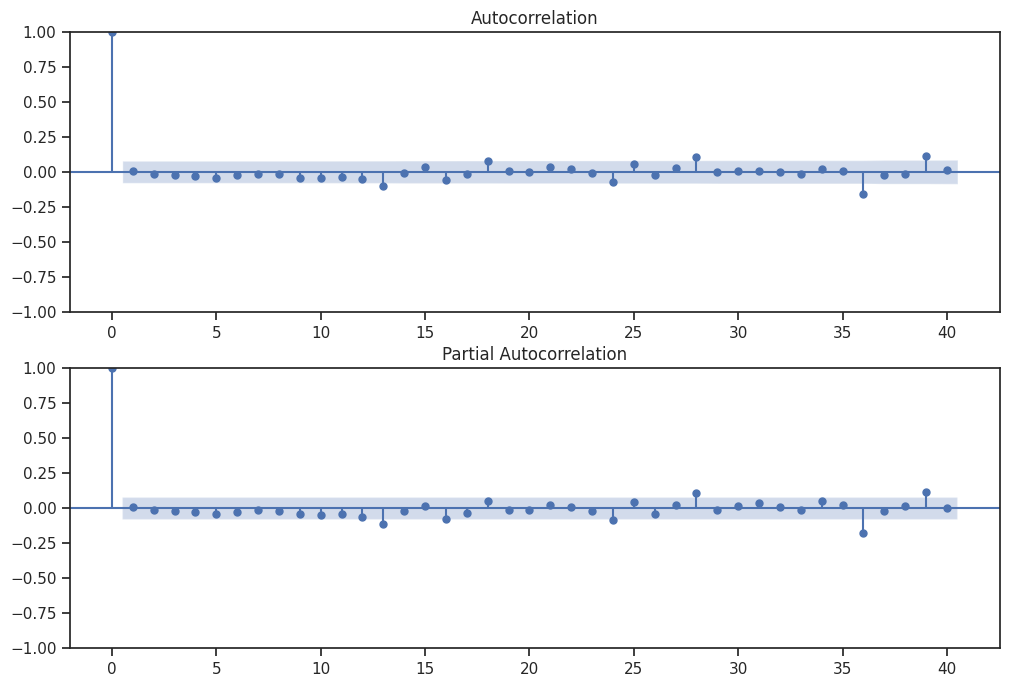

In [ ]:
residual_plot(sarima_mod_a)

In [ ]:
print(train1.shape)
train1.head()

(628,)


Date
2015-01-24    2575.0
2015-01-23    3206.0
2015-01-22    3728.0
2015-01-21    4524.0
2015-01-20    3955.0
Name: Sales, dtype: float64

In [ ]:
train1_reindex = train1.reindex(index=train1.index[::-1])
train1_reindex
mydata_a = train1_reindex
print(mydata_a)
temp_df =pd.DataFrame(mydata_a)
mydata_a = temp_df

Date
2013-01-02    4422.0
2013-01-03    4159.0
2013-01-04    4484.0
2013-01-05    2342.0
2013-01-07    6775.0
               ...  
2015-01-20    3955.0
2015-01-21    4524.0
2015-01-22    3728.0
2015-01-23    3206.0
2015-01-24    2575.0
Name: Sales, Length: 628, dtype: float64


In [ ]:
sarima_mod_a_train = sm.tsa.statespace.SARIMAX(mydata_a, trend='n', order=(11,1,0), seasonal_order=(2,1,0,12)).fit()
print(sarima_mod_a_train.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  628
Model:             SARIMAX(11, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -5313.756
Date:                             Wed, 13 Nov 2024   AIC                          10655.511
Time:                                     09:58:12   BIC                          10717.414
Sample:                                          0   HQIC                         10679.582
                                             - 628                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6231      0.034    -18.515      0.000      -0.689      -0.557
ar.L2         -0.3803      

NormaltestResult(statistic=77.36656480672704, pvalue=1.5851264408195725e-17)


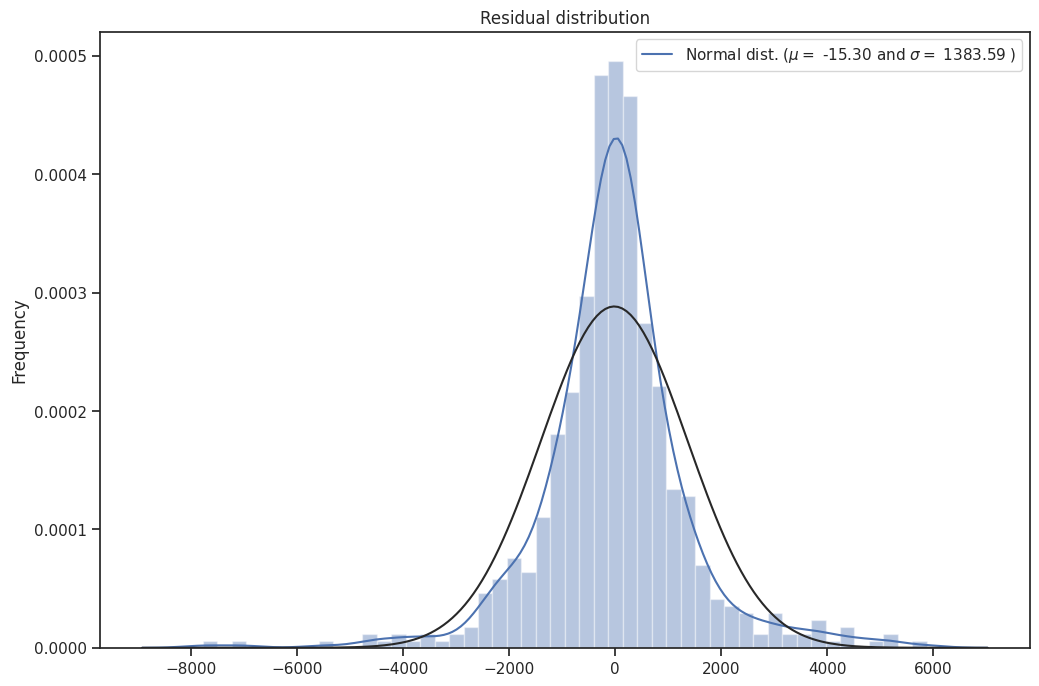

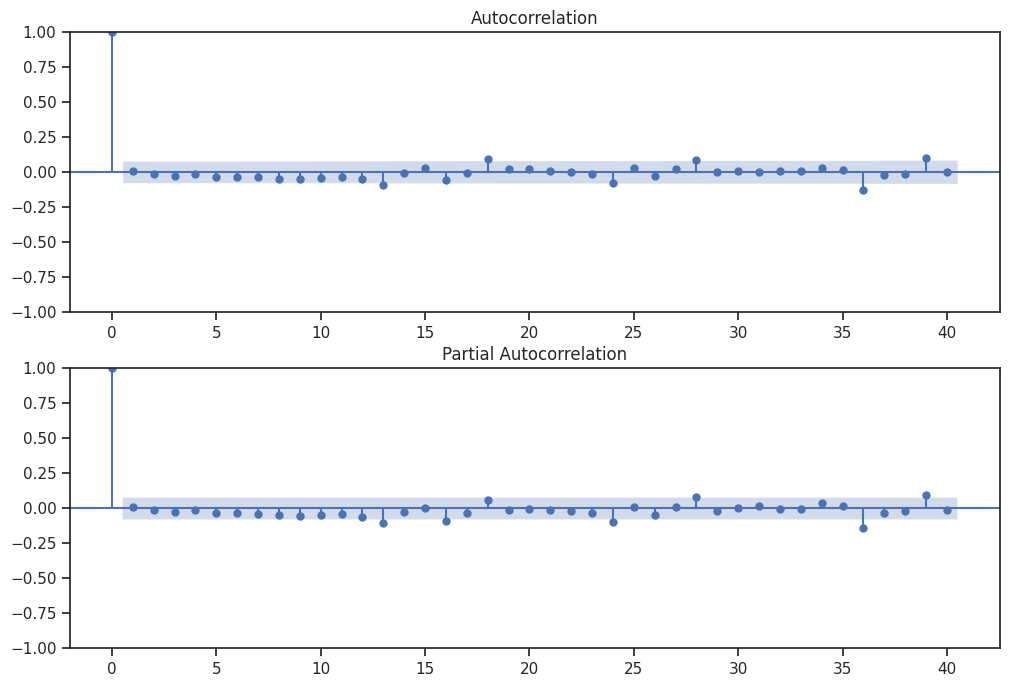

In [ ]:
residual_plot(sarima_mod_a_train)

Text(0.5, 0, 'Time')

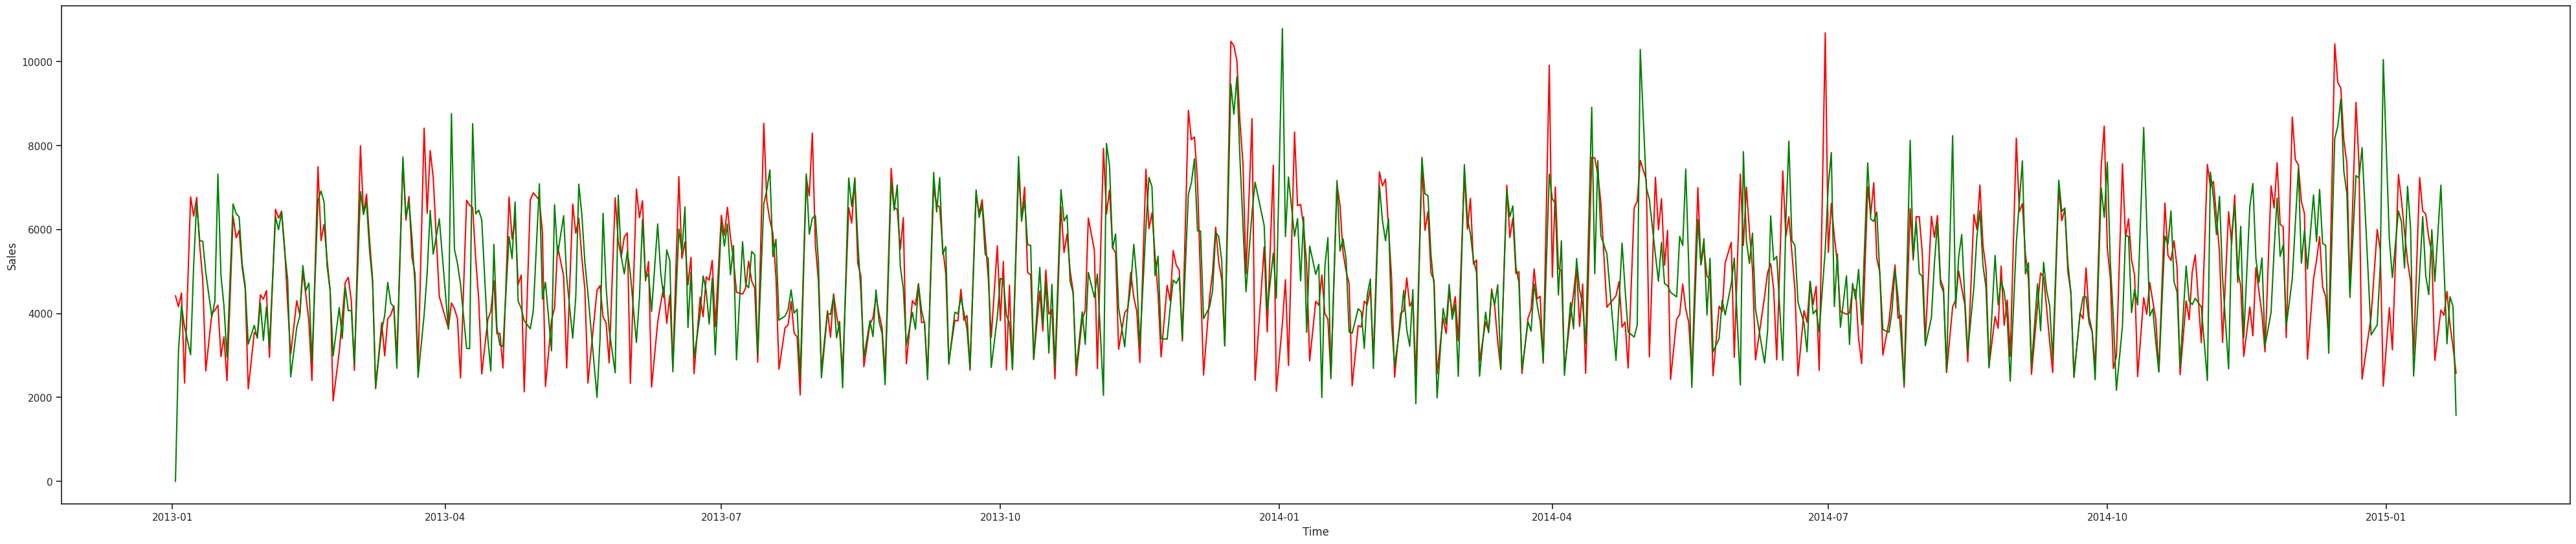

In [ ]:
plt.figure(figsize=(50,10))
plt.plot(mydata_a, c='red')
plt.plot(sarima_mod_a_train.fittedvalues, c='green')
plt.ylabel("Sales")
plt.xlabel("Time")

In [ ]:
test1.head()
test1_df=pd.DataFrame(test1)
test1_df

Sales
Date              
2015-07-31  6064.0
2015-07-30  5567.0
2015-07-29  6402.0
2015-07-28  5671.0
2015-07-27  6627.0
...            ...
2015-01-30  5919.0
2015-01-29  4775.0
2015-01-28  6032.0
2015-01-27  5258.0
2015-01-26  5931.0

[156 rows x 1 columns]

In [ ]:
calculate_rmse_mae(sarima_mod_a_train, test1_df)

RMSE: 2129.4174242077124
MAE: 1663.9758770039953


(2129.4174242077124, 1663.9758770039953)

In [ ]:
sarima_mod_b = sm.tsa.statespace.SARIMAX(train2, trend='n', order=(11,1,0), seasonal_order=(2,1,0,12)).fit()
print(sarima_mod_b.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  786
Model:             SARIMAX(11, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -7010.563
Date:                             Wed, 13 Nov 2024   AIC                          14049.126
Time:                                     09:59:10   BIC                          14114.229
Sample:                                          0   HQIC                         14074.176
                                             - 786                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5850      0.051    -11.555      0.000      -0.684      -0.486
ar.L2         -0.4553      

NormaltestResult(statistic=31.973805737108826, pvalue=1.1401875682260919e-07)


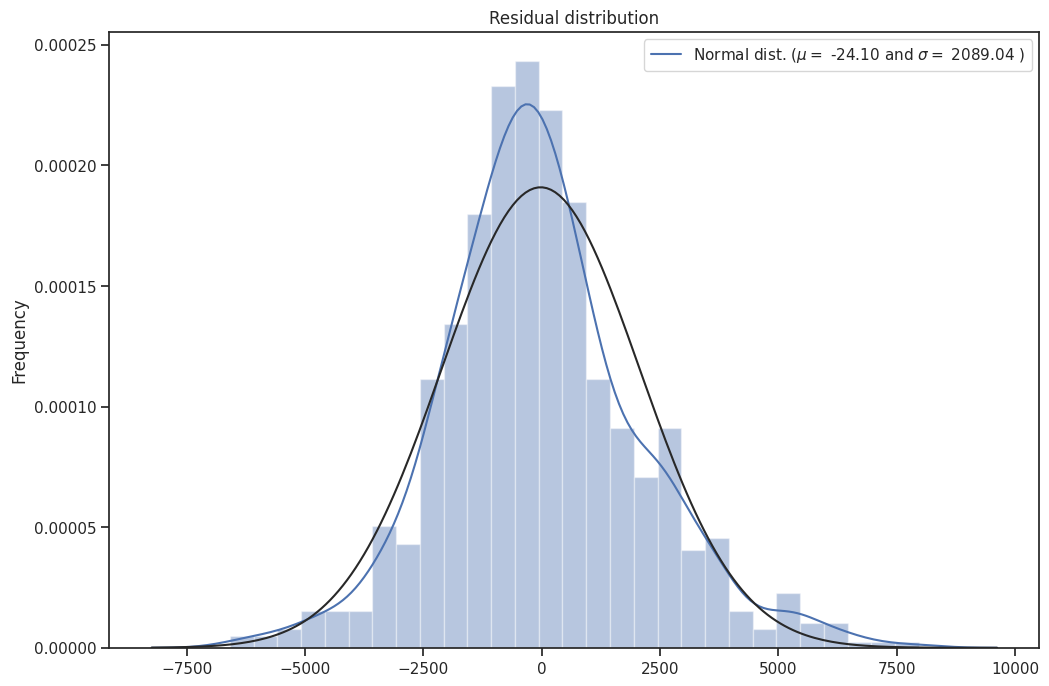

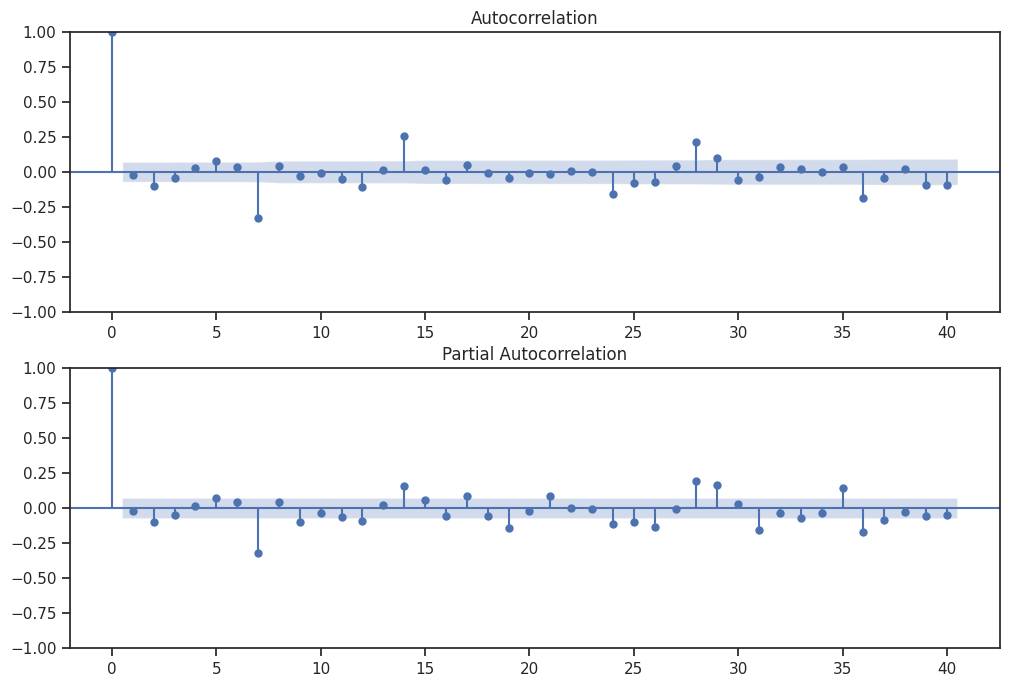

In [ ]:
residual_plot(sarima_mod_b)

In [ ]:
print(train2.shape)
train2.head()

(786,)


Date
2015-02-25     6278.0
2015-02-24     5425.0
2015-02-23     6250.0
2015-02-22    12454.0
2015-02-21     5444.0
Name: Sales, dtype: float64

In [ ]:
train2_reindex = train2.reindex(index=train2.index[::-1])
#sales_b_reindex.head(100)
mydata_b = train2_reindex
temp_df =pd.DataFrame(mydata_b)
mydata_b = temp_df

In [ ]:
sarima_mod_b_train = sm.tsa.statespace.SARIMAX(mydata_b, trend='n', order=(11,1,0), seasonal_order=(2,1,0,12)).fit()
print(sarima_mod_b_train.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  786
Model:             SARIMAX(11, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -7012.315
Date:                             Wed, 13 Nov 2024   AIC                          14052.631
Time:                                     09:59:47   BIC                          14117.735
Sample:                                 01-01-2013   HQIC                         14077.681
                                      - 02-25-2015                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5740      0.047    -12.096      0.000      -0.667      -0.481
ar.L2         -0.4495      

NormaltestResult(statistic=24.97909786547652, pvalue=3.7658049073897416e-06)


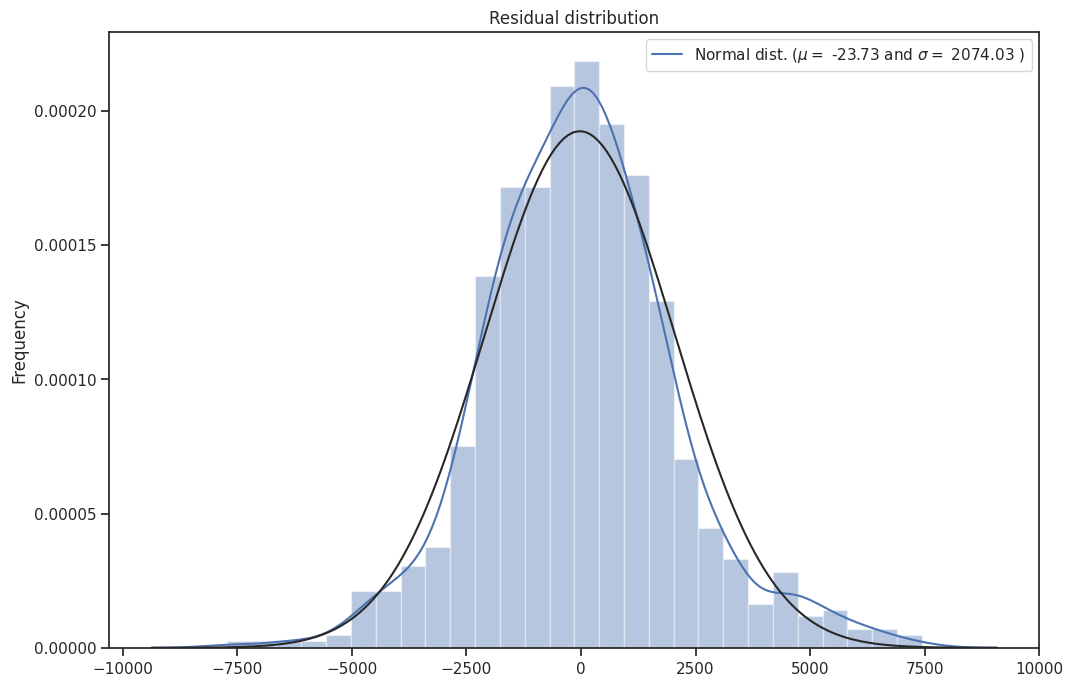

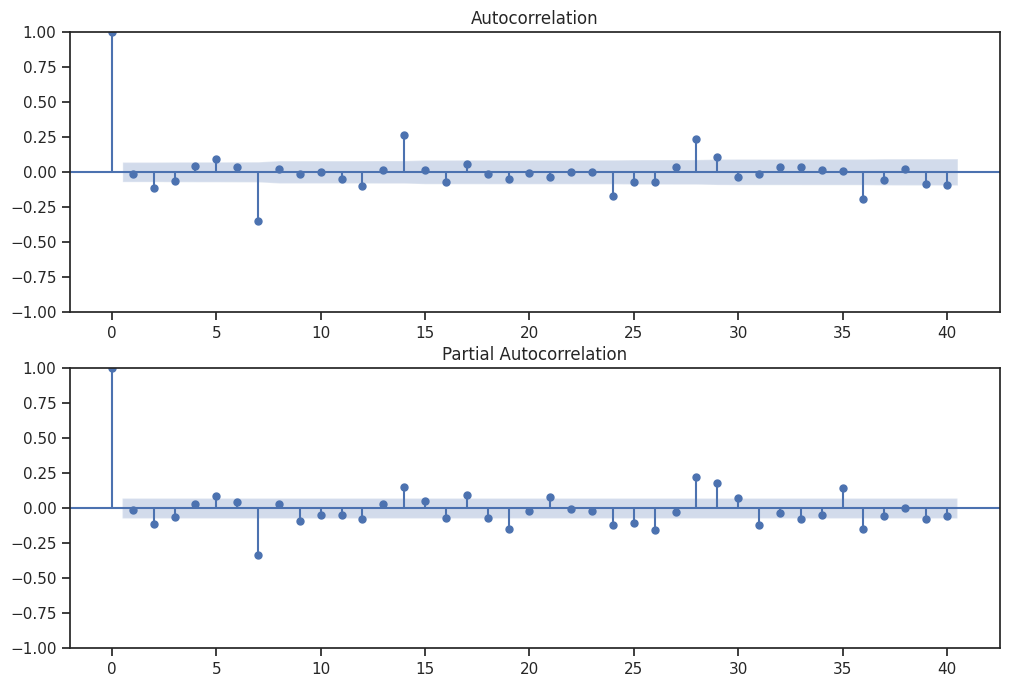

In [ ]:
residual_plot(sarima_mod_b_train)

Text(0.5, 0, 'Time')

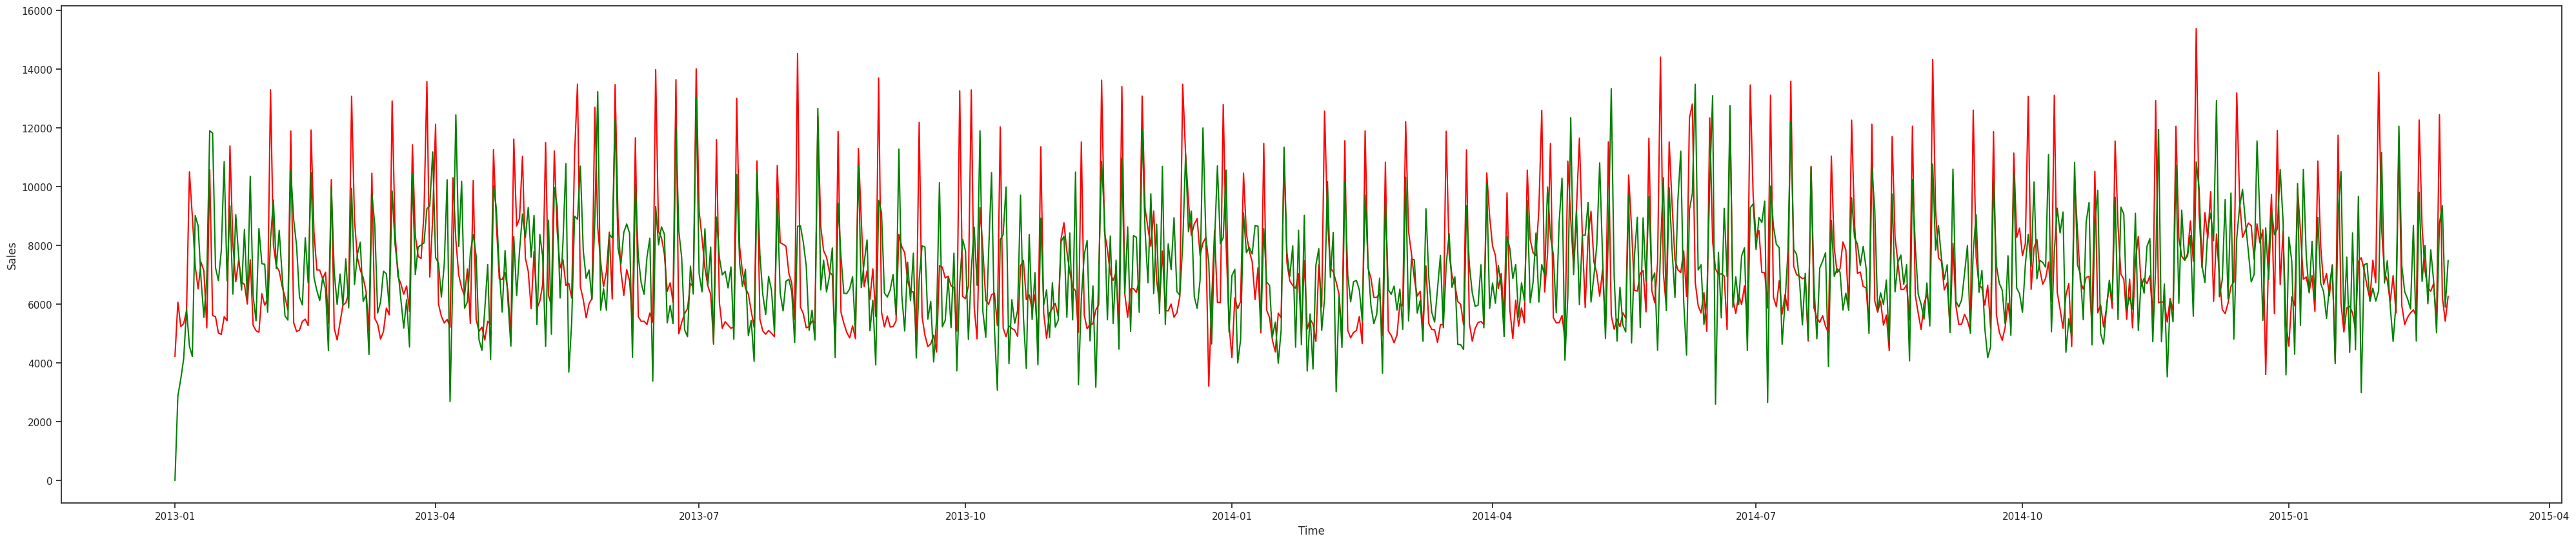

In [ ]:
plt.figure(figsize=(50,10))
plt.plot(mydata_b, c='red')
plt.plot(sarima_mod_b_train.fittedvalues, c='green')
plt.ylabel("Sales")
plt.xlabel("Time")

In [ ]:
test2.head()
test2_df=pd.DataFrame(test2)
test2_df
calculate_rmse_mae(sarima_mod_b_train, test2_df)

RMSE: 2836.369771792874
MAE: 2180.271877039769


(2836.369771792874, 2180.271877039769)

In [ ]:
sarima_mod_c = sm.tsa.statespace.SARIMAX(train3, trend='n', order=(11,1,0),seasonal_order=(2,1,2,12)).fit()
print(sarima_mod_c.summary())

                                        SARIMAX Results                                         
Dep. Variable:                                    Sales   No. Observations:                  625
Model:             SARIMAX(11, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood               -4911.213
Date:                                  Wed, 13 Nov 2024   AIC                           9854.426
Time:                                          10:00:48   BIC                           9925.093
Sample:                                               0   HQIC                          9881.911
                                                  - 625                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3231      0.034     -9.503      0.000      -0.390

NormaltestResult(statistic=118.78013253574969, pvalue=1.6114689429829665e-26)


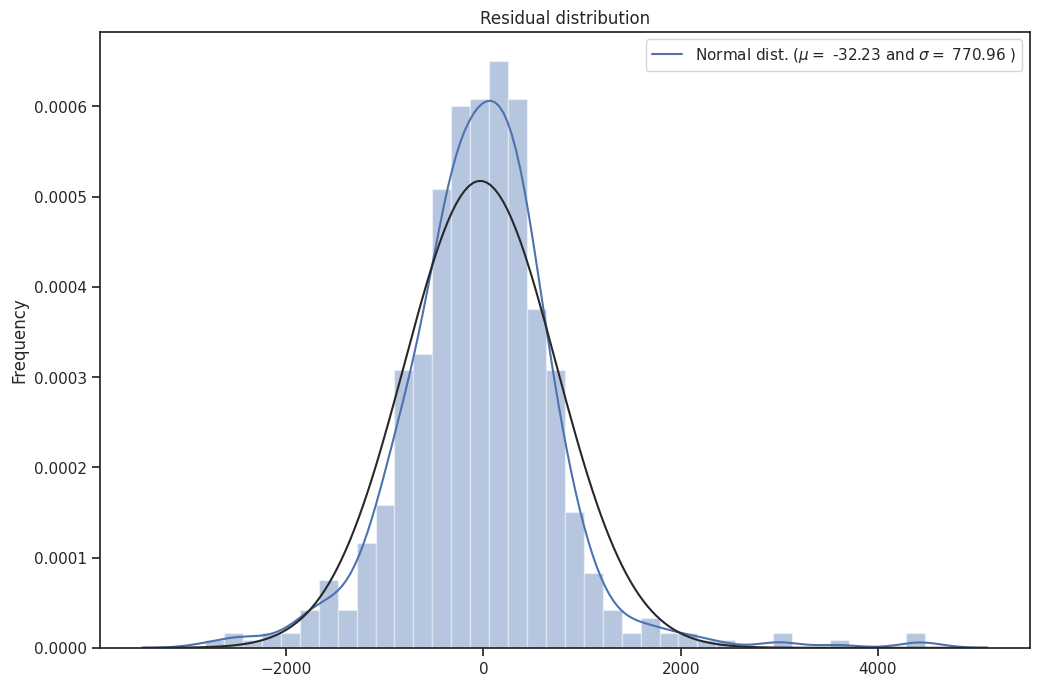

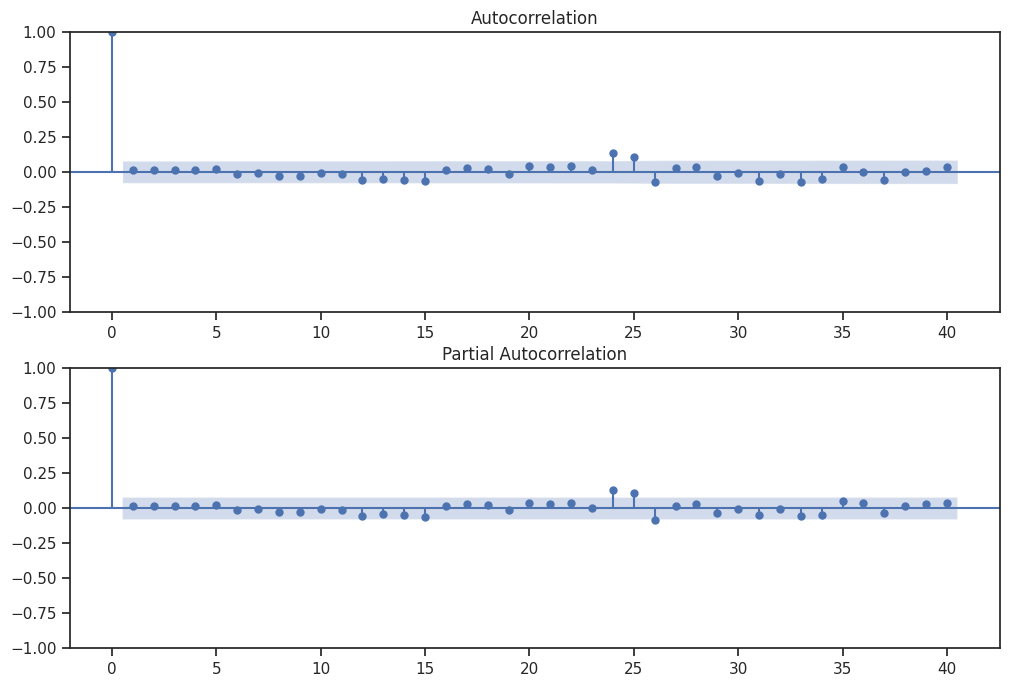

In [ ]:
residual_plot(sarima_mod_c)

In [ ]:
train3_reindex = train3.reindex(index=train3.index[::-1])
mydata_c = train3_reindex
temp_df =pd.DataFrame(mydata_c)
mydata_c = temp_df

In [ ]:
sarima_mod_c_train = sm.tsa.statespace.SARIMAX(mydata_c, trend='n', order=(11,1,0), seasonal_order=(2,1,2,12)).fit()
print(sarima_mod_c_train.summary())

                                        SARIMAX Results                                         
Dep. Variable:                                    Sales   No. Observations:                  625
Model:             SARIMAX(11, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood               -4909.896
Date:                                  Wed, 13 Nov 2024   AIC                           9851.793
Time:                                          10:02:23   BIC                           9922.461
Sample:                                               0   HQIC                          9879.278
                                                  - 625                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3182      0.029    -10.799      0.000      -0.376

NormaltestResult(statistic=99.16413263983515, pvalue=2.929423734239544e-22)


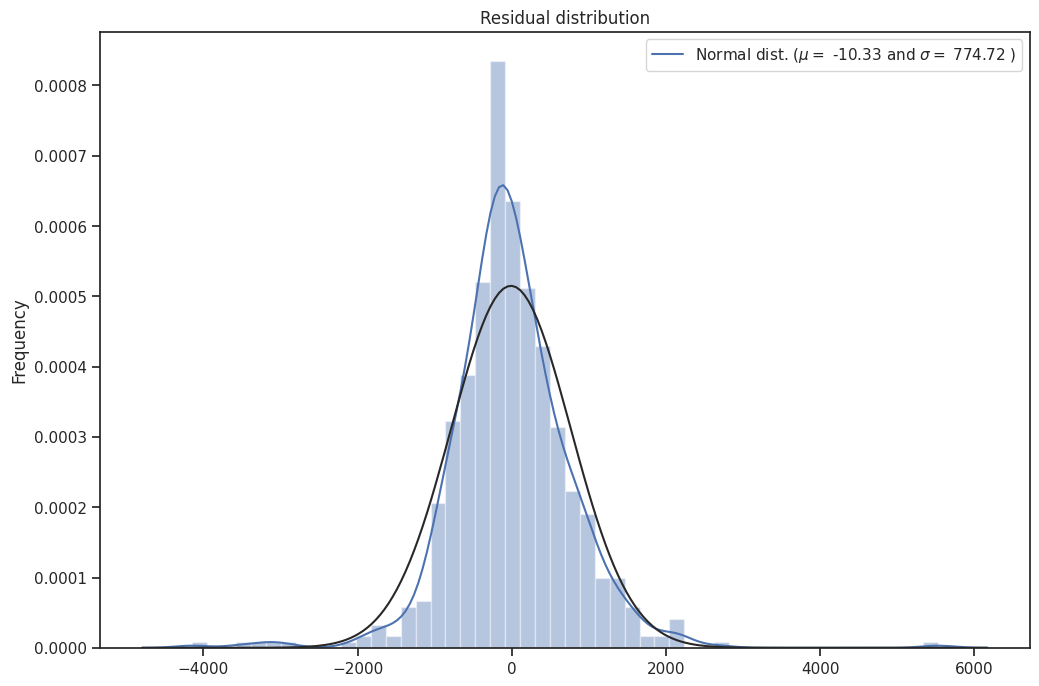

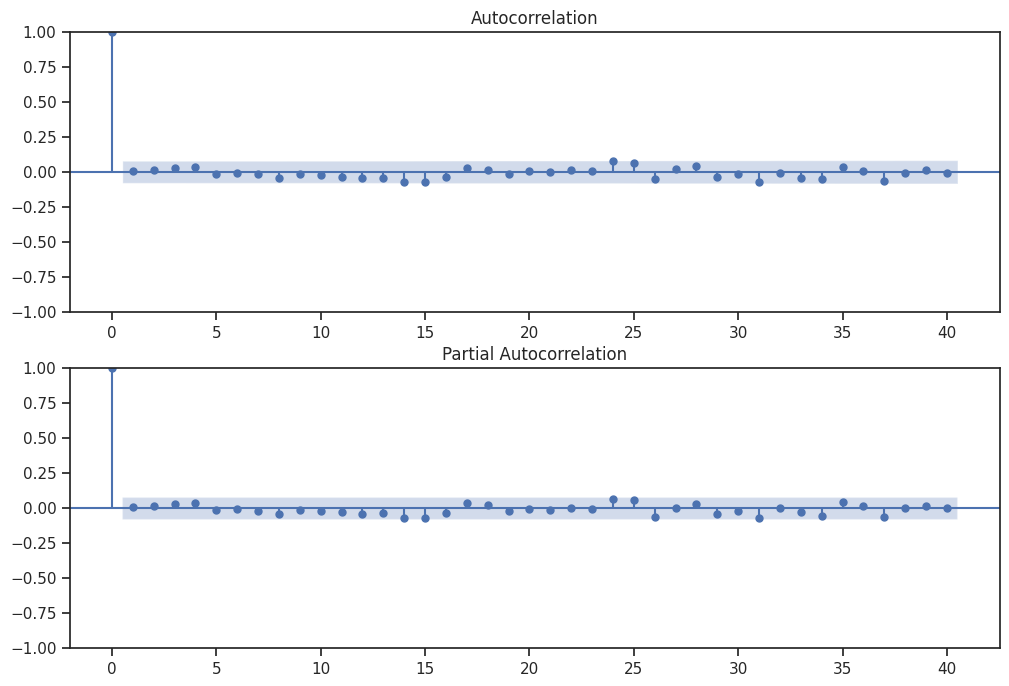

In [ ]:
residual_plot(sarima_mod_c_train)

In [ ]:
print(train3.shape)
train3.head()

(625,)


Date
2015-01-23    3586.0
2015-01-22    3492.0
2015-01-21    3299.0
2015-01-20    3680.0
2015-01-19    3721.0
Name: Sales, dtype: float64

Text(0.5, 0, 'Time')

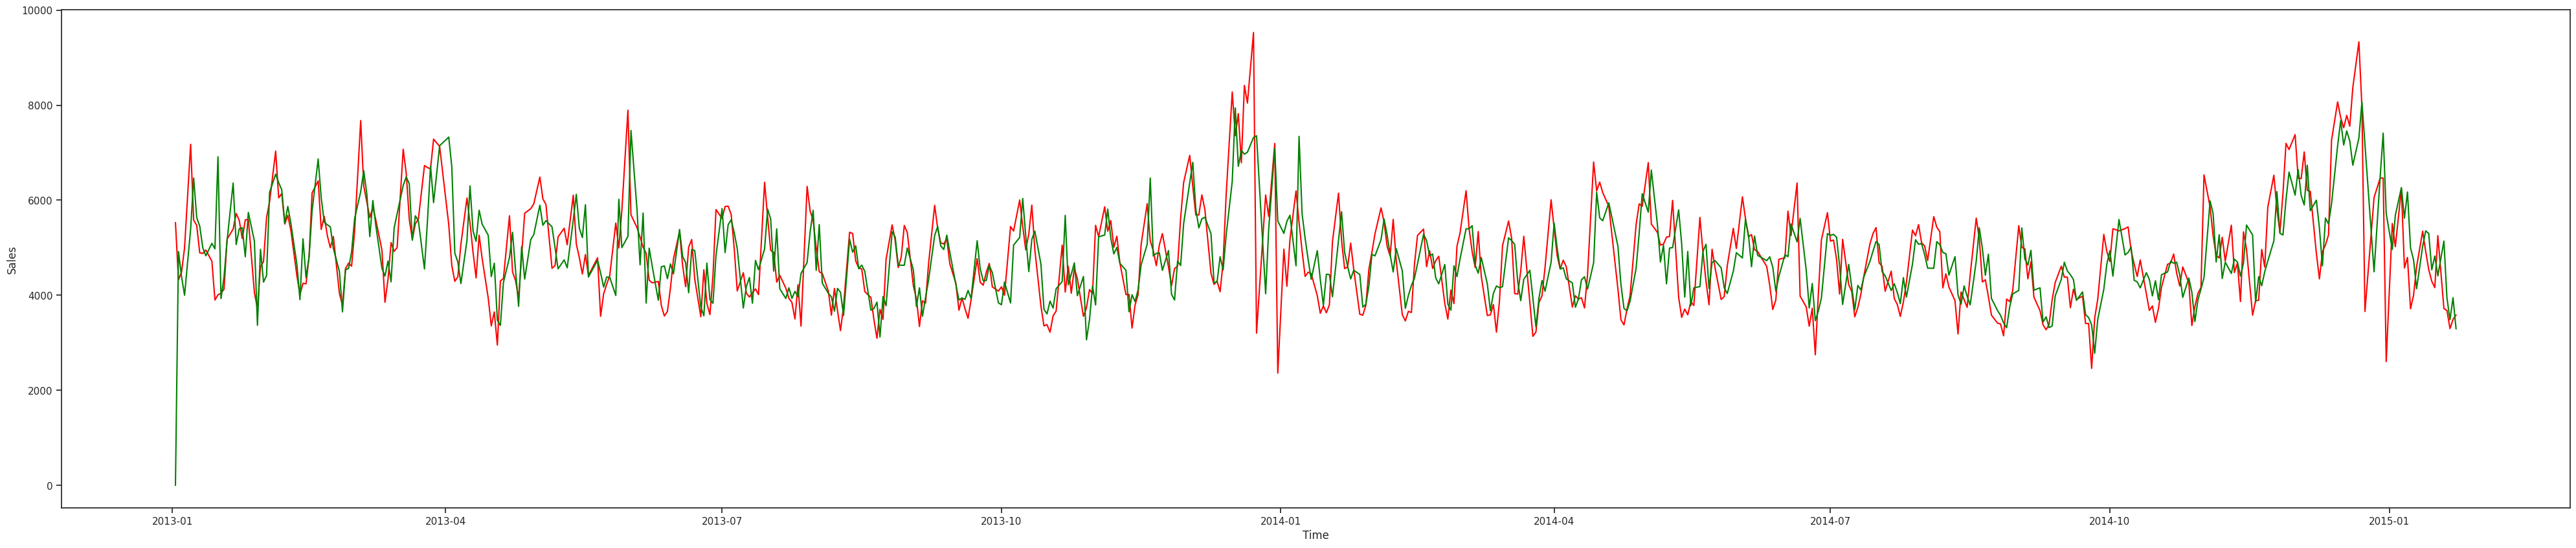

In [ ]:
plt.figure(figsize=(50,10))
plt.plot(mydata_c, c='red')
plt.plot(sarima_mod_c_train.fittedvalues, c='green')
plt.ylabel("Sales")
plt.xlabel("Time")

In [ ]:
test3.head()
test3_df=pd.DataFrame(test3)
test3_df
calculate_rmse_mae(sarima_mod_c_train, test3_df)

RMSE: 1297.8546421240676
MAE: 1031.720104854536


(1297.8546421240676, 1031.720104854536)

In [ ]:
sarima_mod_d = sm.tsa.statespace.SARIMAX(train4, trend='n', order=(11,1,0),seasonal_order=(2,1,0,12)).fit()
print(sarima_mod_d.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  621
Model:             SARIMAX(11, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -5312.870
Date:                             Wed, 13 Nov 2024   AIC                          10653.740
Time:                                     10:02:56   BIC                          10715.482
Sample:                                          0   HQIC                         10677.761
                                             - 621                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4017      0.034    -11.894      0.000      -0.468      -0.336
ar.L2         -0.2736      

NormaltestResult(statistic=113.93792502905104, pvalue=1.8142366673969936e-25)


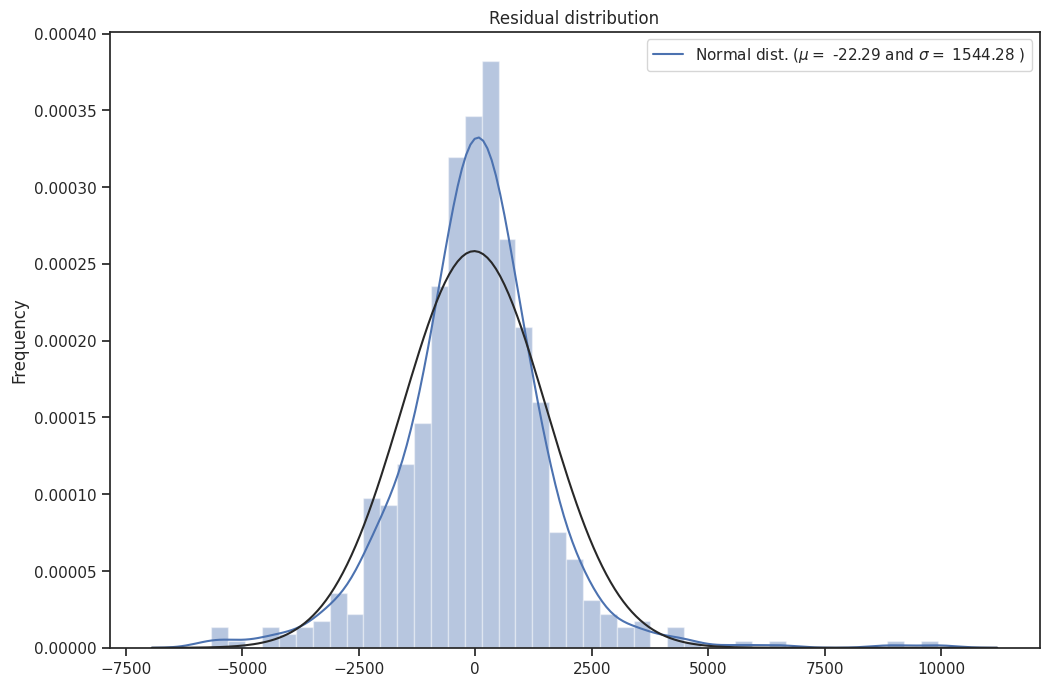

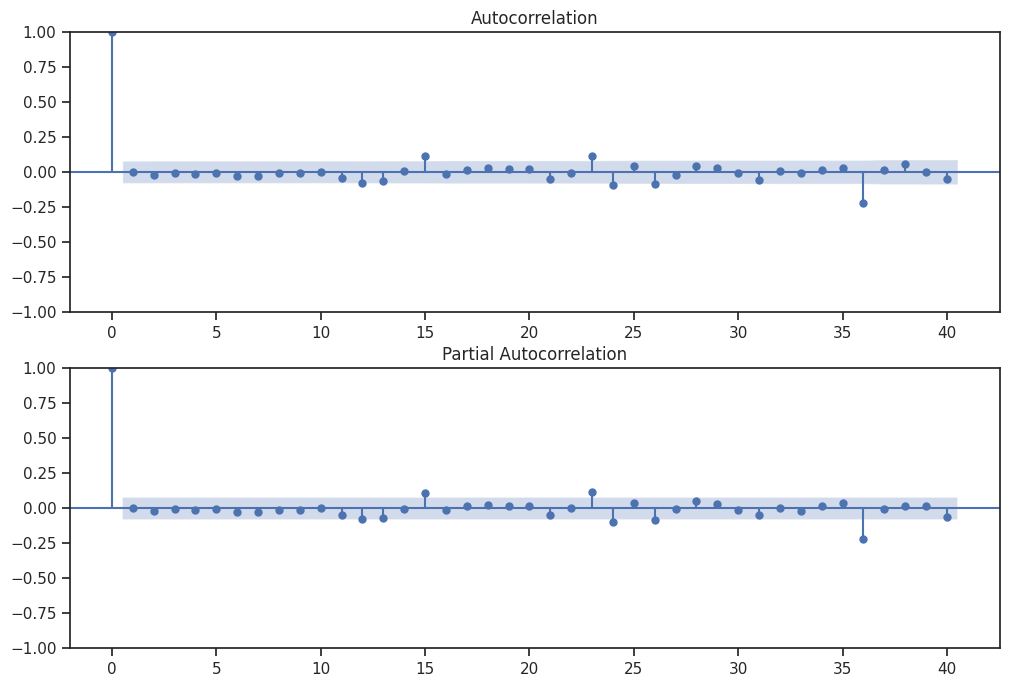

In [ ]:
residual_plot(sarima_mod_d)

In [ ]:
print(train4.shape)
train4.head()

(621,)


Date
2015-01-23    6512.0
2015-01-22    5108.0
2015-01-21    4507.0
2015-01-20    5528.0
2015-01-19    5659.0
Name: Sales, dtype: float64

In [ ]:
train4_reindex = train4.reindex(index=train4.index[::-1])
mydata_d = train4_reindex
temp_df =pd.DataFrame(mydata_d)
mydata_d = temp_df

In [ ]:
sarima_mod_d_train = sm.tsa.statespace.SARIMAX(mydata_d, trend='n', order=(11,1,0),seasonal_order=(2,1,0,12)).fit()
print(sarima_mod_d_train.summary())


                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  621
Model:             SARIMAX(11, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -5307.925
Date:                             Wed, 13 Nov 2024   AIC                          10643.850
Time:                                     10:03:26   BIC                          10705.593
Sample:                                          0   HQIC                         10667.871
                                             - 621                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4034      0.026    -15.747      0.000      -0.454      -0.353
ar.L2         -0.2716      

NormaltestResult(statistic=62.67041737048085, pvalue=2.462021145996963e-14)


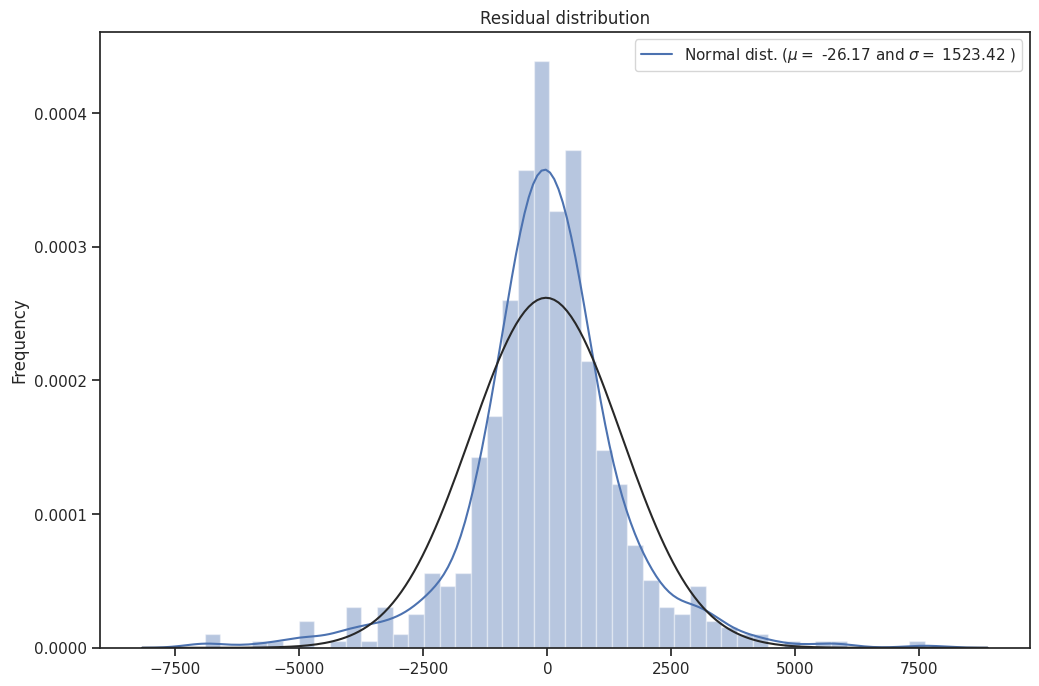

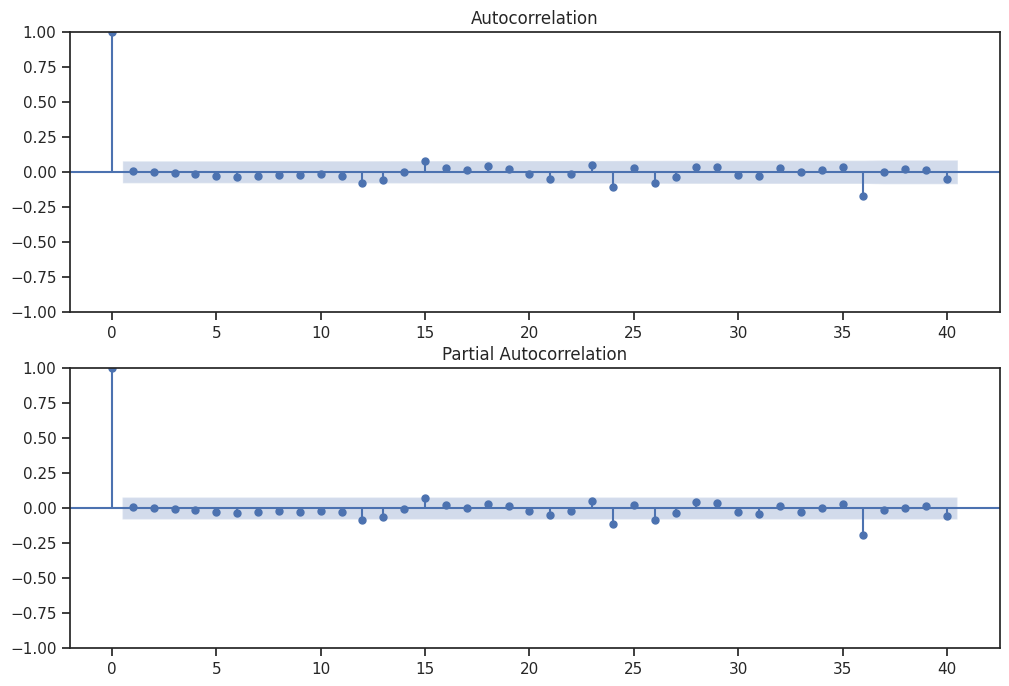

In [ ]:
residual_plot(sarima_mod_d_train)

Text(0.5, 0, 'Time')

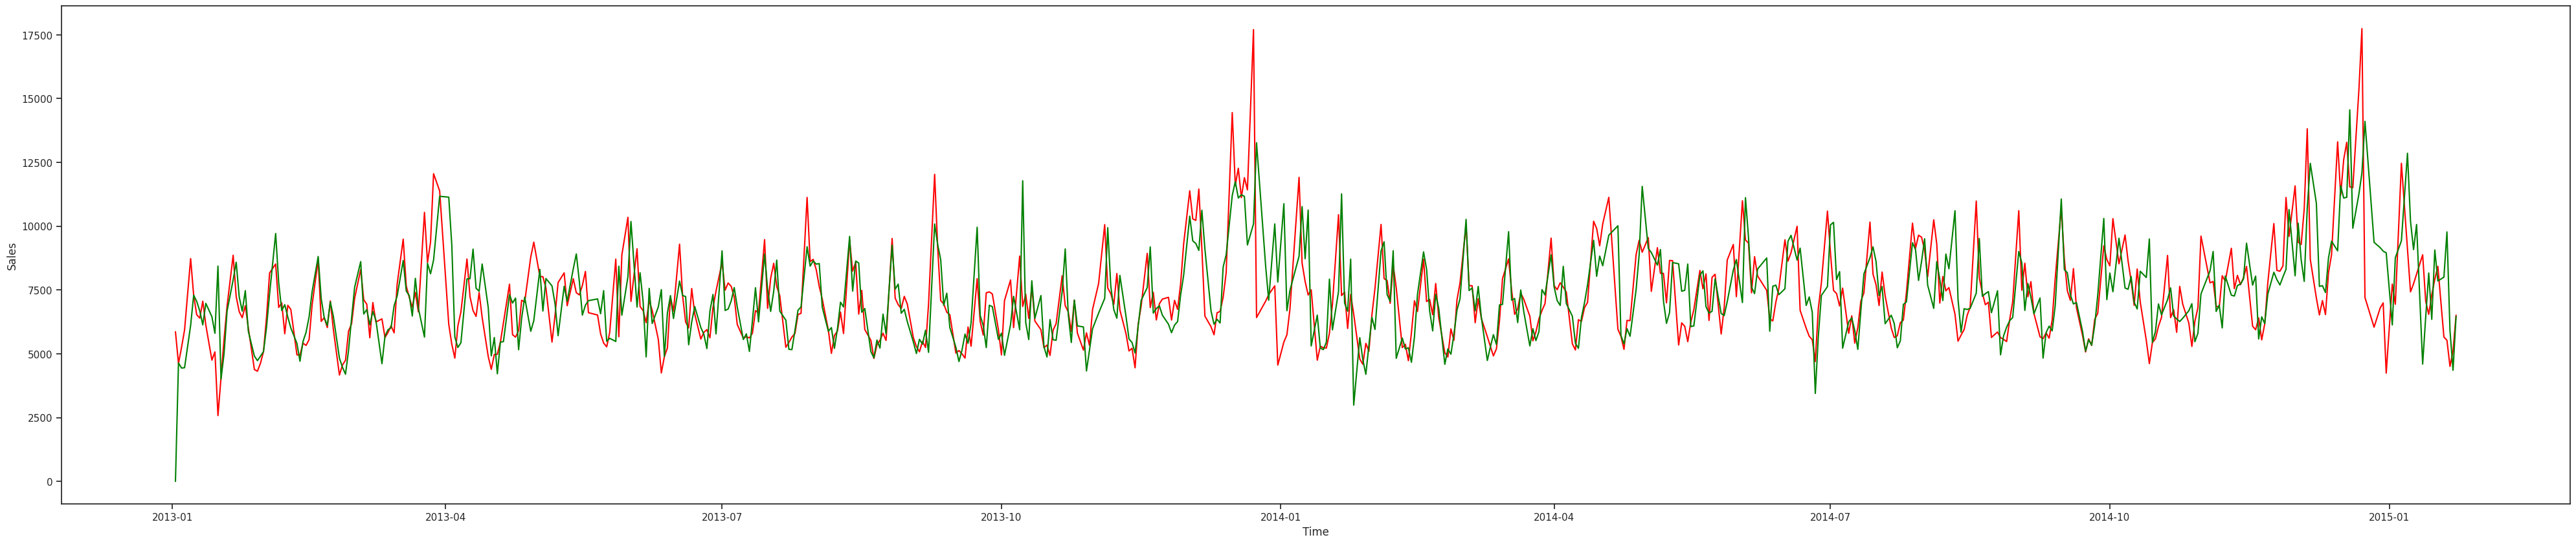

In [ ]:
# Store type D
plt.figure(figsize=(50,10))
plt.plot(mydata_d, c='red')
plt.plot(sarima_mod_d_train.fittedvalues, c='green')
plt.ylabel("Sales")
plt.xlabel("Time")

In [ ]:
test4.head()
test4_df=pd.DataFrame(test4)
test4_df
calculate_rmse_mae(sarima_mod_d_train, test4_df)

RMSE: 2356.8913037561106
MAE: 1717.6645362064965


(2356.8913037561106, 1717.6645362064965)

In [ ]:
mydata_a.head()

Sales
Date              
2013-01-02  4422.0
2013-01-03  4159.0
2013-01-04  4484.0
2013-01-05  2342.0
2013-01-07  6775.0

DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7vi562f/aecs74tv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7vi562f/a5hydc21.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64317', 'data', 'file=/tmp/tmpp7vi562f/aecs74tv.json', 'init=/tmp/tmpp7vi562f/a5hydc21.json', 'output', 'file=/tmp/tmpp7vi562f/prophet_model07f94pu0/prophet_model-20241113100328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:03:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:03:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


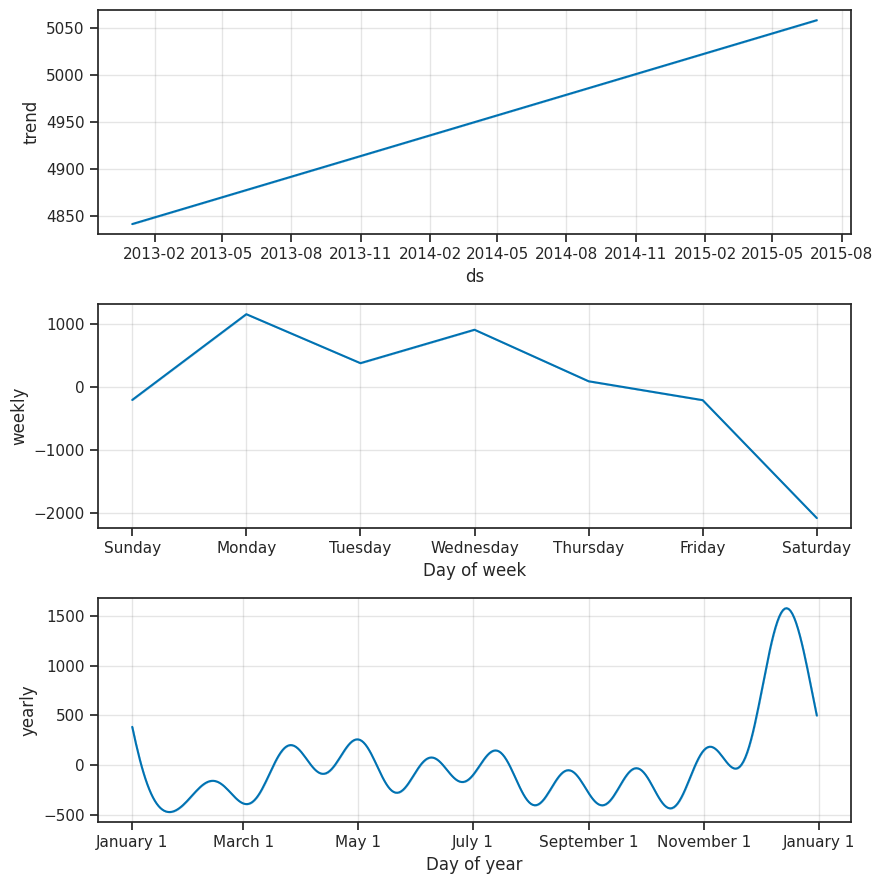

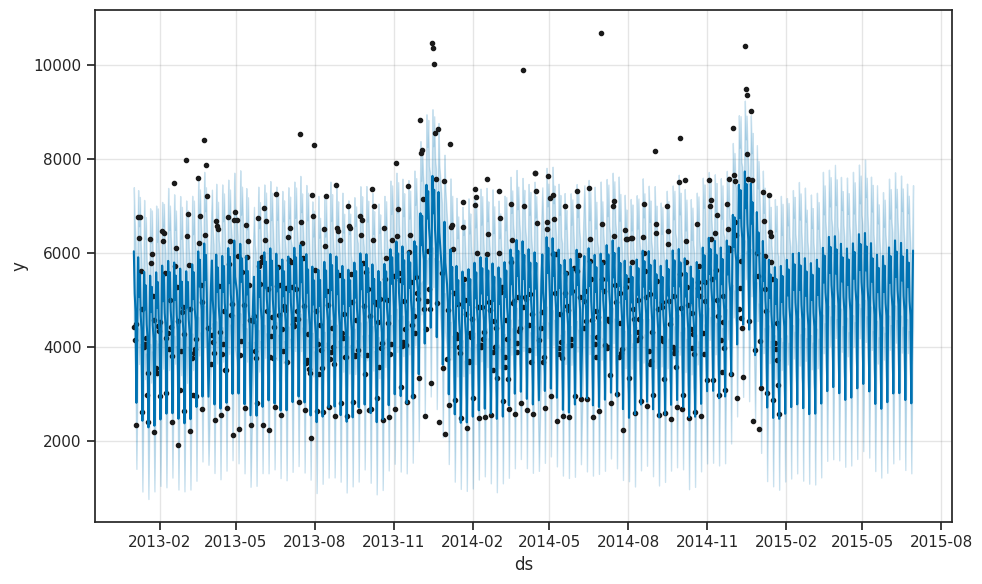

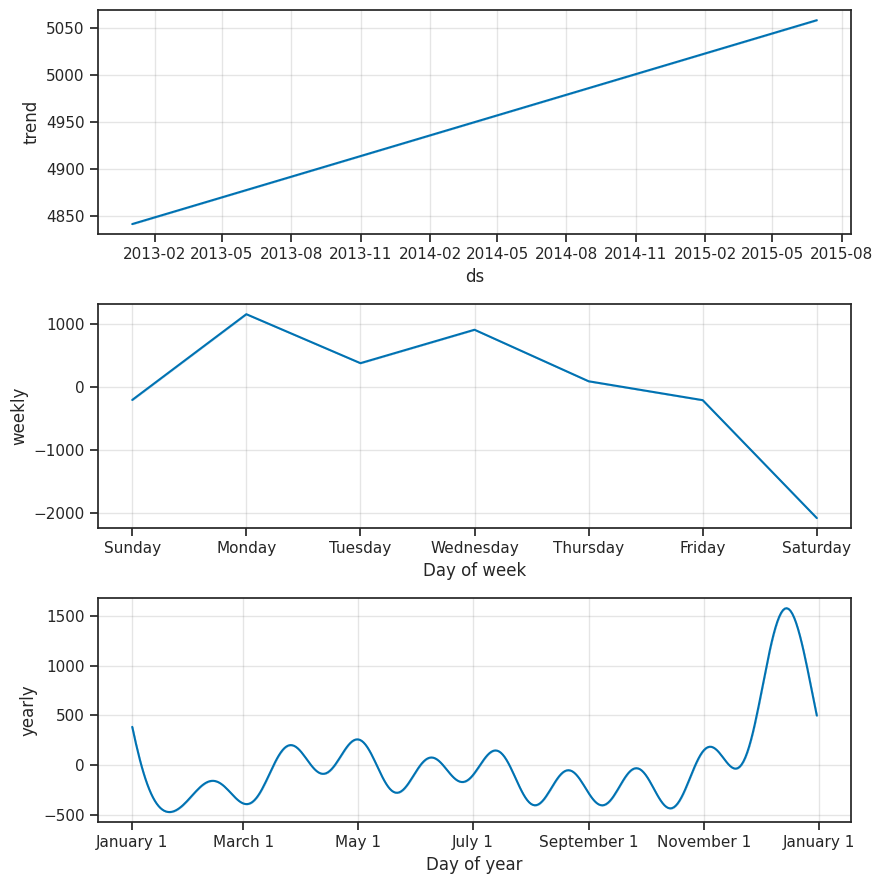

In [ ]:
from prophet import Prophet
import pandas as pd

# Rename the 'Sales' column to 'y'
mydata_a = mydata_a.rename(columns={'Sales': 'y'})

# Assuming your data is in a DataFrame called `sales_data` with a 'date' column and a sales column
# Replace 'sales_a' with your specific sales column name for store A
df1 = pd.DataFrame({'ds': mydata_a.index, 'y': mydata_a['y']})  # Initialize the Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)  # Set seasonality as appropriate
model.fit(df1)  # Pass the correctly formatted 'df' DataFrame to the fit method

# Make future predictions
future = model.make_future_dataframe(periods=len(test1_df), freq='D')  # Adjust `freq` if data is not daily
forecast = model.predict(future)

# Display the forecasted results
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# Plot the forecast
model.plot(forecast)
model.plot_components(forecast)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'sales_a' is the correct column name in test1_df for sales
# If 'y' exists, this line can be removed or modified accordingly
test1_df['y'] = test1_df['Sales']  # Rename or create 'y' column if needed

# Extract the predictions for the test period
test_forecast = forecast[-len(test1_df):]

# If the predicted values column is not named 'yhat', change it here
predicted_sales_column = 'yhat'  # Replace with the actual column name if different

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test1_df['y'], test_forecast[predicted_sales_column]))
mae = mean_absolute_error(test1_df['y'], test_forecast[predicted_sales_column])

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 1857.0138363817161
MAE: 1475.7353682768646


In [ ]:
mydata_b.head()

Sales
Date              
2013-01-01  4220.0
2013-01-02  6069.0
2013-01-03  5246.0
2013-01-04  5339.0
2013-01-05  5774.0

DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7vi562f/dn3h7z0z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7vi562f/pclfzxqo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16213', 'data', 'file=/tmp/tmpp7vi562f/dn3h7z0z.json', 'init=/tmp/tmpp7vi562f/pclfzxqo.json', 'output', 'file=/tmp/tmpp7vi562f/prophet_modelepiget8j/prophet_model-20241113100330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:03:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:03:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


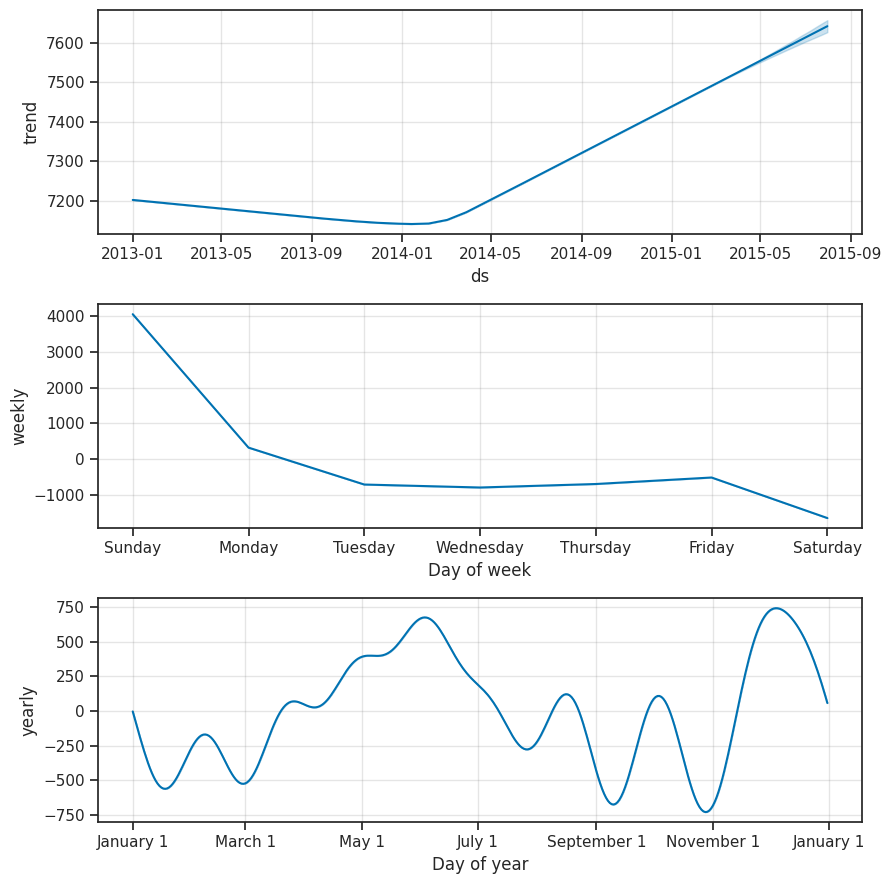

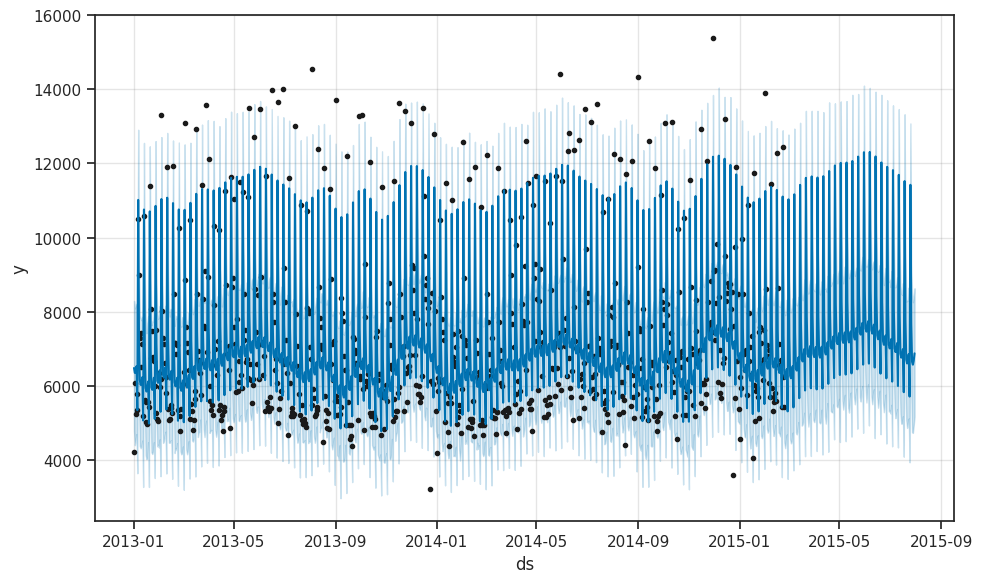

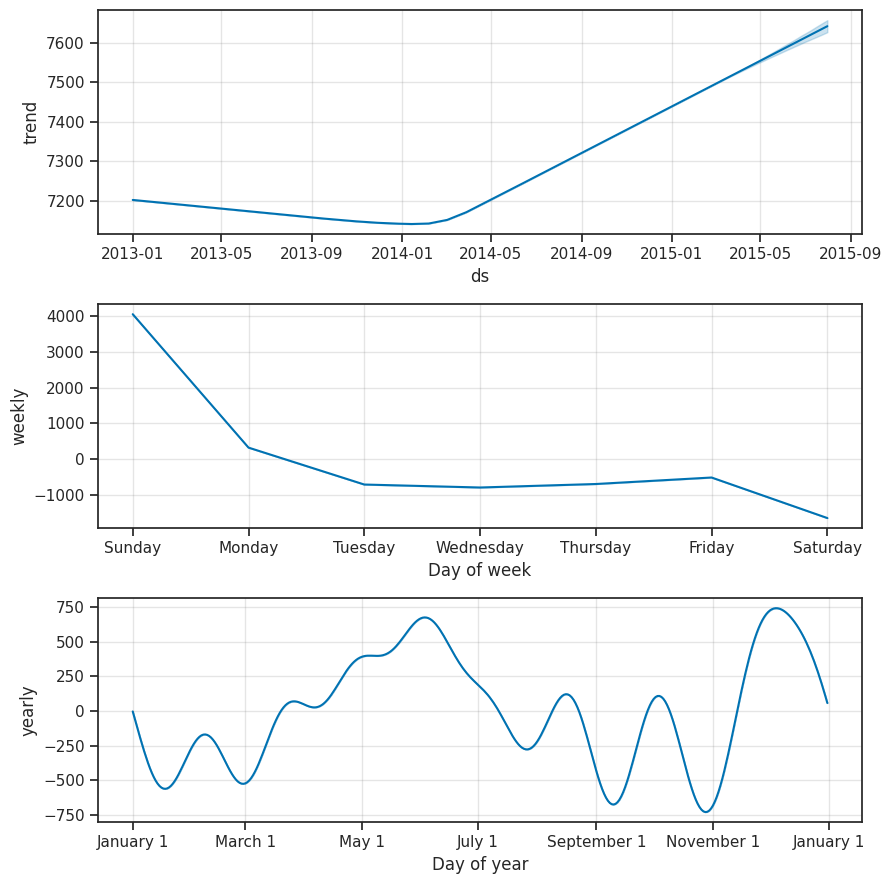

In [ ]:
from prophet import Prophet
import pandas as pd


df2 = pd.DataFrame({'ds': mydata_b.index, 'y': mydata_b['Sales']}) # Initialize the Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)  # Set seasonality as appropriate
model.fit(df2) # Pass the correctly formatted 'df' DataFrame to the fit method

# Make future predictions
future = model.make_future_dataframe(periods=len(test2_df), freq='D')  # Adjust `freq` if data is not daily
forecast = model.predict(future)

# Display the forecasted results
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# Plot the forecast
model.plot(forecast)
model.plot_components(forecast)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'sales_a' is the correct column name in test1_df for sales
# If 'y' exists, this line can be removed or modified accordingly
test2_df['y'] = test2_df['Sales']  # Rename or create 'y' column if needed

# Extract the predictions for the test period
test_forecast = forecast[-len(test2_df):]

# If the predicted values column is not named 'yhat', change it here
predicted_sales_column = 'yhat'  # Replace with the actual column name if different

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test2_df['y'], test_forecast[predicted_sales_column]))
mae = mean_absolute_error(test2_df['y'], test_forecast[predicted_sales_column])

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 3058.597437632061
MAE: 2301.2743315296643


In [ ]:
mydata_c.head()

Sales
Date              
2013-01-02  5530.0
2013-01-03  4327.0
2013-01-04  4486.0
2013-01-05  4997.0
2013-01-07  7176.0

DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7vi562f/o0b_8p89.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7vi562f/omkacx3m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91338', 'data', 'file=/tmp/tmpp7vi562f/o0b_8p89.json', 'init=/tmp/tmpp7vi562f/omkacx3m.json', 'output', 'file=/tmp/tmpp7vi562f/prophet_modelkz_bf3v3/prophet_model-20241113100333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:03:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:03:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


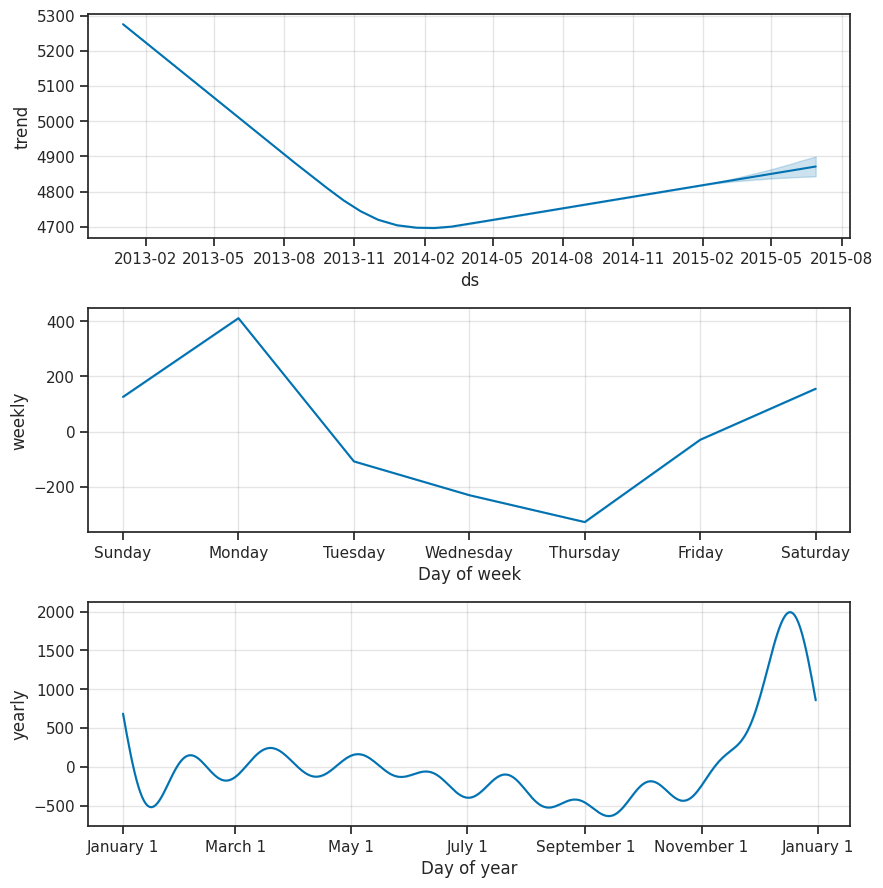

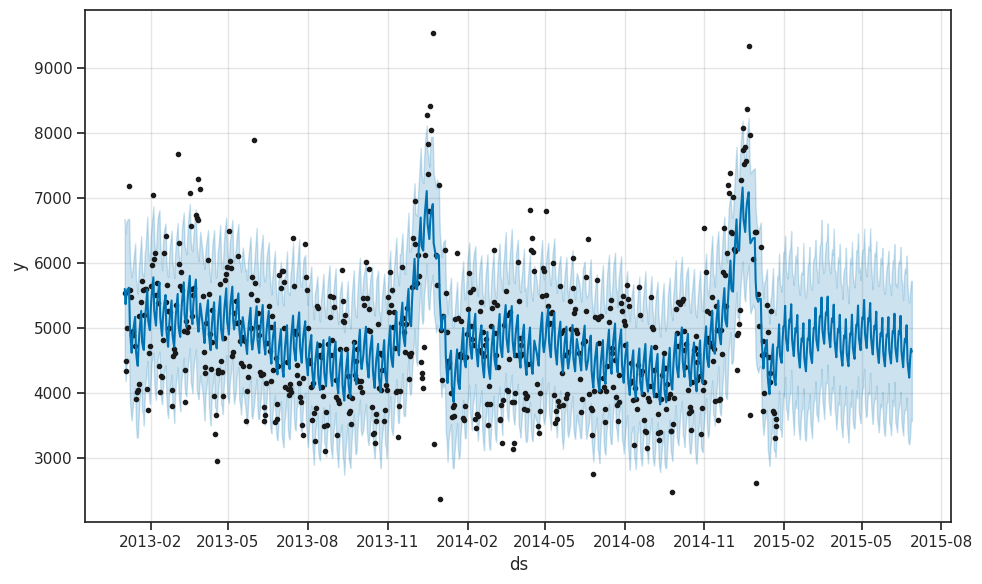

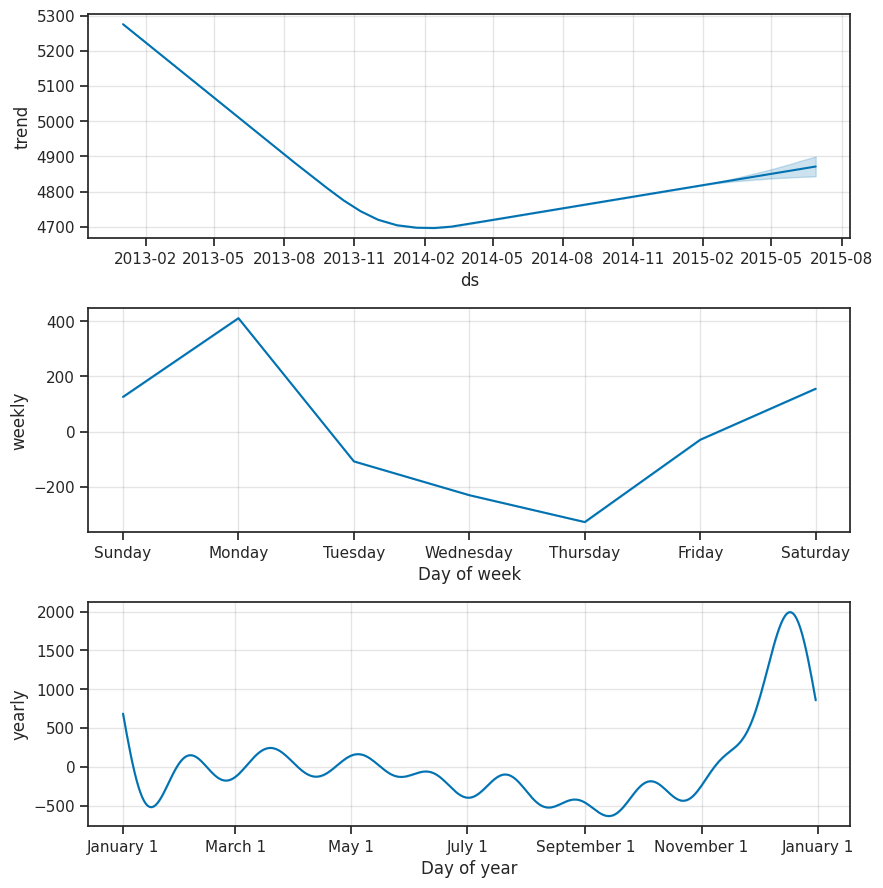

In [ ]:
from prophet import Prophet
import pandas as pd

# Assuming your data is in a DataFrame called `sales_data` with a 'date' column and a sales column
# Replace 'sales_a' with your specific sales column name for store A
df3 = pd.DataFrame({'ds': mydata_c.index, 'y': mydata_c['Sales']}) # Initialize the Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)  # Set seasonality as appropriate
model.fit(df3) # Pass the correctly formatted 'df' DataFrame to the fit method

# Make future predictions
future = model.make_future_dataframe(periods=len(test3_df), freq='D')  # Adjust `freq` if data is not daily
forecast = model.predict(future)

# Display the forecasted results
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# Plot the forecast
model.plot(forecast)
model.plot_components(forecast)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'sales_a' is the correct column name in test1_df for sales
# If 'y' exists, this line can be removed or modified accordingly
test3_df['y'] = test3_df['Sales']  # Rename or create 'y' column if needed

# Extract the predictions for the test period
test_forecast = forecast[-len(test3_df):]

# If the predicted values column is not named 'yhat', change it here
predicted_sales_column = 'yhat'  # Replace with the actual column name if different

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test3_df['y'], test_forecast[predicted_sales_column]))
mae = mean_absolute_error(test3_df['y'], test_forecast[predicted_sales_column])

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 918.1680090193339
MAE: 772.2607665959434


In [ ]:
mydata_d.head()

Sales
Date              
2013-01-02  5866.0
2013-01-03  4622.0
2013-01-04  5250.0
2013-01-05  5937.0
2013-01-07  8731.0

DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7vi562f/b7l5yyc1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7vi562f/noz4tdq4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99424', 'data', 'file=/tmp/tmpp7vi562f/b7l5yyc1.json', 'init=/tmp/tmpp7vi562f/noz4tdq4.json', 'output', 'file=/tmp/tmpp7vi562f/prophet_model4e6wfvew/prophet_model-20241113100336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:03:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:03:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


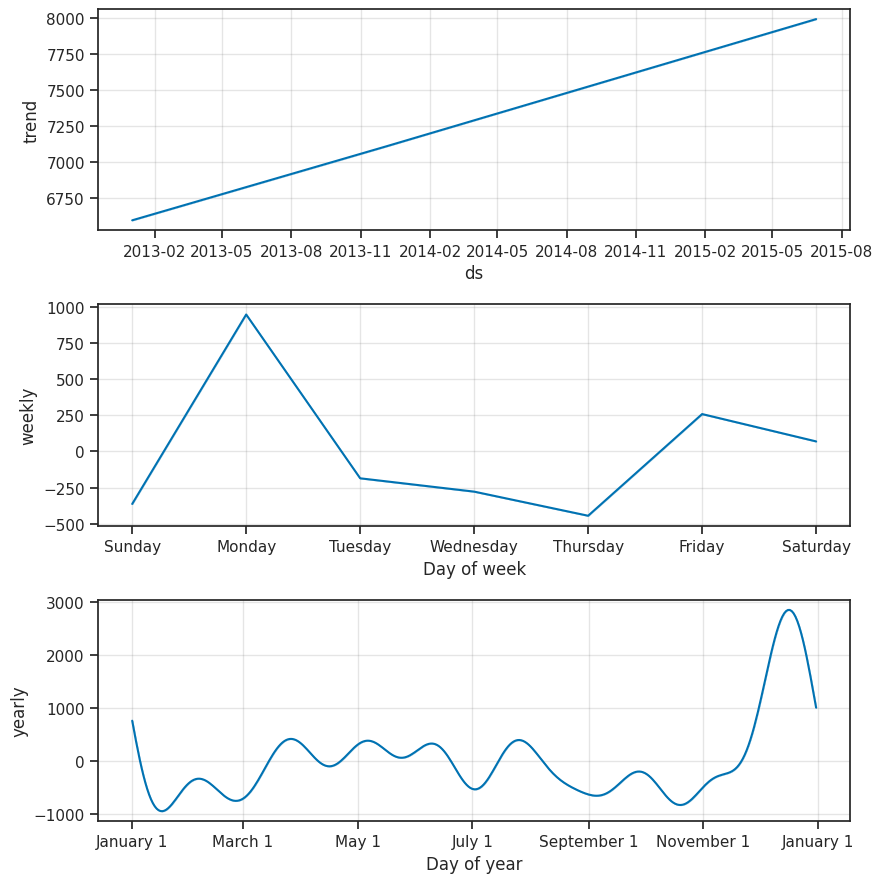

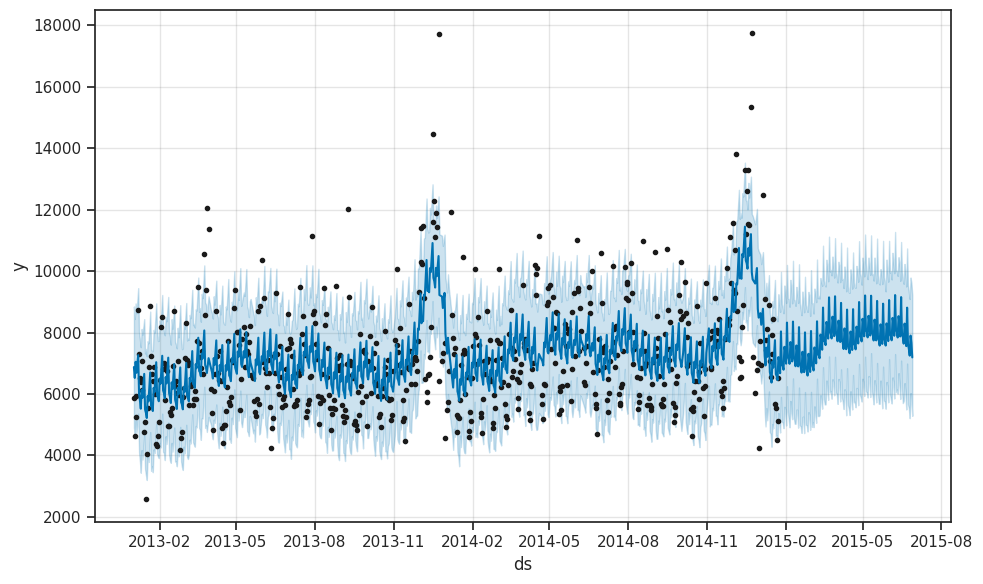

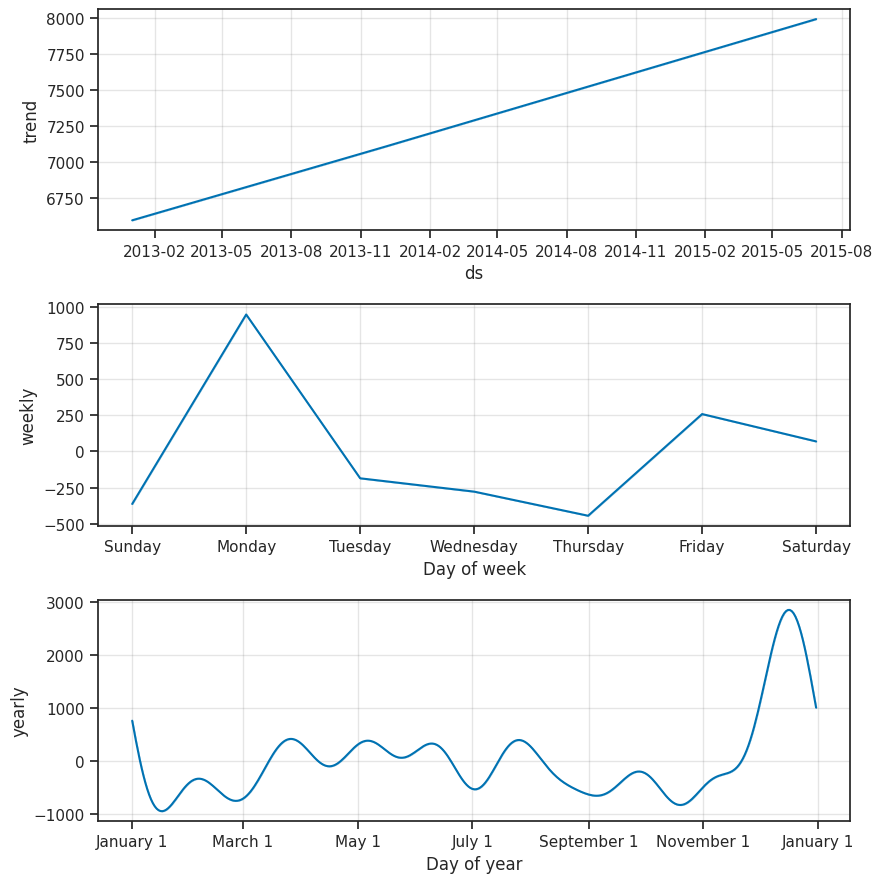

In [ ]:
from prophet import Prophet
import pandas as pd

# Assuming your data is in a DataFrame called `sales_data` with a 'date' column and a sales column
# Replace 'sales_a' with your specific sales column name for store A
df4 = pd.DataFrame({'ds': mydata_d.index, 'y': mydata_d['Sales']}) # Initialize the Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)  # Set seasonality as appropriate
model.fit(df4) # Pass the correctly formatted 'df' DataFrame to the fit method

# Make future predictions
future = model.make_future_dataframe(periods=len(test4_df), freq='D')  # Adjust `freq` if data is not daily
forecast = model.predict(future)

# Display the forecasted results
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# Plot the forecast
model.plot(forecast)
model.plot_components(forecast)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'sales_a' is the correct column name in test1_df for sales
# If 'y' exists, this line can be removed or modified accordingly
test4_df['y'] = test4_df['Sales']  # Rename or create 'y' column if needed

# Extract the predictions for the test period
test_forecast = forecast[-len(test4_df):]

# If the predicted values column is not named 'yhat', change it here
predicted_sales_column = 'yhat'  # Replace with the actual column name if different

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test4_df['y'], test_forecast[predicted_sales_column]))
mae = mean_absolute_error(test4_df['y'], test_forecast[predicted_sales_column])

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 1756.9188432911972
MAE: 1392.9489344459819


In [ ]:
final_test = pd.read_csv("/content/drive/MyDrive/ML Project /MLP2/test.csv")
store_data = pd.read_csv("/content/drive/MyDrive/ML Project /MLP2/store.csv")

In [ ]:
final_test.head(15)

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0    1      1          4  2015-09-17   1.0      1            0              0
1    2      3          4  2015-09-17   1.0      1            0              0
2    3      7          4  2015-09-17   1.0      1            0              0
3    4      8          4  2015-09-17   1.0      1            0              0
4    5      9          4  2015-09-17   1.0      1            0              0
5    6     10          4  2015-09-17   1.0      1            0              0
6    7     11          4  2015-09-17   1.0      1            0              0
7    8     12          4  2015-09-17   1.0      1            0              0
8    9     13          4  2015-09-17   1.0      1            0              0
9   10     14          4  2015-09-17   1.0      1            0              0
10  11     15          4  2015-09-17   1.0      1            0              0
11  12     16          4  2015-09-17   1.0      1            0              0
12  13     19          4  2015-09-17   1.0      1            0              0
13  14     20          4  2015-09-17   1.0      1            0              0
14  15     21          4  2015-09-17   1.0      1            0              0

In [ ]:
import pandas as pd

# Load test and store datasets
final_test = pd.read_csv("/content/drive/MyDrive/ML Project /MLP2/test.csv")
store_data = pd.read_csv("/content/drive/MyDrive/ML Project /MLP2/store.csv")

# Date parsing and setting index for final_test
final_test['Date'] = pd.to_datetime(final_test['Date'], errors='coerce')
final_test.set_index('Date', inplace=True)

# Extract date features for test data
final_test['Year'] = final_test.index.year
final_test['Month'] = final_test.index.month
final_test['Day'] = final_test.index.day
final_test['WeekOfYear'] = final_test.index.isocalendar().week

# Fill missing values in test data with 0
final_test.fillna(0, inplace=True)

# Remove rows where 'Open' is 0, as they don't contribute to sales (optional based on your model’s design)
final_test = final_test[final_test['Open'] != 0]

# Handle missing values in store_data, specifically for competition-related fields
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace=True)
store_data.fillna(0, inplace=True)

# Merge final_test with store_data to get full dataset with store information
test_store = pd.merge(final_test.reset_index(), store_data, on='Store', how='inner')

# Calculate competition and promo open time in months
test_store['CompetitionOpen'] = 12 * (test_store['Year'] - test_store['CompetitionOpenSinceYear']) + \
                                (test_store['Month'] - test_store['CompetitionOpenSinceMonth'])
test_store['PromoOpen'] = 12 * (test_store['Year'] - test_store['Promo2SinceYear']) + \
                          (test_store['WeekOfYear'] - test_store['Promo2SinceWeek']) / 4.0

# Replace remaining NaNs in 'CompetitionOpen' and 'PromoOpen' with 0
test_store.fillna(0, inplace=True)

# Convert categorical columns to numeric if needed for SARIMA models
test_store['StoreType'] = test_store['StoreType'].astype('category')
test_store['Assortment'] = test_store['Assortment'].astype('category')

# Separate the data for each store type and resample

# StoreType a
test_store_a = test_store[test_store['StoreType'] == 'a'].copy()
test_store_a = test_store_a.set_index('Date').select_dtypes(include=[float, int]).resample('D').mean()

# StoreType b
test_store_b = test_store[test_store['StoreType'] == 'b'].copy()
test_store_b = test_store_b.set_index('Date').select_dtypes(include=[float, int]).resample('D').mean()

# StoreType c
test_store_c = test_store[test_store['StoreType'] == 'c'].copy()
test_store_c = test_store_c.set_index('Date').select_dtypes(include=[float, int]).resample('D').mean()

# StoreType d
test_store_d = test_store[test_store['StoreType'] == 'd'].copy()
test_store_d = test_store_d.set_index('Date').select_dtypes(include=[float, int]).resample('D').mean()



In [ ]:
test_store_a = test_store_a.interpolate(method='linear')  # Linear interpolation


In [ ]:
test_store_b.head()
test_store_b = test_store_b.interpolate(method='linear')  # Linear interpolation


In [ ]:
test_store_c.head()
test_store_c = test_store_c.interpolate(method='linear')  # Linear interpolation


In [ ]:
test_store_d = test_store_d.interpolate(method='linear')  # Linear interpolation


Choose prediction mode:
1. Predict sales for a single day
2. Predict sales for a date range
Enter your choice (1 or 2): 2
Enter store type (0 - a, 1 - b, 2 - c, 3 - d): 2
Enter the start date (YYYY-MM-DD): 2014-09-12
Enter the end date (YYYY-MM-DD): 2014-10-23


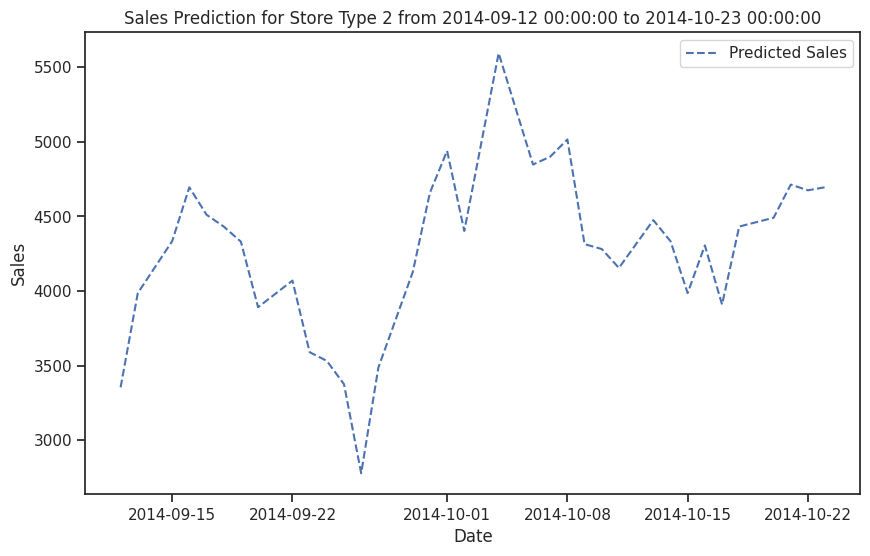

Predicted sales from 2014-09-12 to 2014-10-23 for store type 2: 4695.917598015898


In [ ]:
def predict_sales(store_type, start_date, end_date=None):
    start_date = pd.to_datetime(start_date)
    if end_date:
        end_date = pd.to_datetime(end_date)

    if store_type == 0:
        model = sarima_mod_a_train
    elif store_type == 1:
        model = sarima_mod_b_train
    elif store_type == 2:
        model = sarima_mod_c_train
    elif store_type == 3:
        model = sarima_mod_d_train
    else:
        raise ValueError("Invalid store type provided")

    if end_date:
        predictions = model.predict(start=start_date, end=end_date)
    else:
        predictions = model.predict(start=start_date, end=start_date)

    plt.figure(figsize=(10, 6))
    plt.plot(predictions.index, predictions, label='Predicted Sales', linestyle='--')
    plt.title(f'Sales Prediction for Store Type {store_type} from {start_date} to {end_date or start_date}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

    return predictions

def predict_single_date():
    store_type = int(input("Enter store type (0 - a, 1 - b, 2 - c, 3 - d): "))
    date = input("Enter the date (YYYY-MM-DD) for prediction: ")
    predictions = predict_sales(store_type, date)
    print(f"Predicted sales for store type {store_type} on {date}: {predictions[-1]}")

def predict_date_range():
    store_type = int(input("Enter store type (0 - a, 1 - b, 2 - c, 3 - d): "))
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")
    predictions = predict_sales(store_type, start_date, end_date)
    print(f"Predicted sales from {start_date} to {end_date} for store type {store_type}: {predictions[-1]}")

def main():
    print("Choose prediction mode:")
    print("1. Predict sales for a single day")
    print("2. Predict sales for a date range")
    choice = int(input("Enter your choice (1 or 2): "))

    if choice == 1:
        predict_single_date()
    elif choice == 2:
        predict_date_range()
    else:
        print("Invalid choice. Exiting.")

main()


In [ ]:
mydata_a.head()

y
Date              
2013-01-02  4422.0
2013-01-03  4159.0
2013-01-04  4484.0
2013-01-05  2342.0
2013-01-07  6775.0